In [ ]:
from sklearn.cluster import KMeans
import plotly.express as px

import numpy as np
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import datasets

import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/MMA MYTZZY/RSM 8413/Cluster"
path = "/content/drive/My Drive/MMA MYTZZY/RSM 8413/Cluster"

 CensusCanada2021Test.csv      'G4 - new.ipynb'  'Presentation Title.pptx'   Team19predictions.txt
 CensusCanada2021Training.csv  'Part .gdoc'	 'Report Script.gdoc'


In [ ]:
dftrain_original = pd.read_csv(path + '/CensusCanada2021Training.csv')

dftest_original = pd.read_csv(path + '/CensusCanada2021Test.csv')

# **Part 1**

## Data Preparation

In [ ]:
dftrain

Total Population  Total Households  \
0                 3088            1235.0   
1                 5889            1665.0   
2                 8090            2775.0   
3                 4074            1775.0   
4                 3642            1385.0   
...                ...               ...   
5366              3409            1460.0   
5367              8408            4195.0   
5368              3609            1460.0   
5369              3084            1165.0   
5370              6934            3615.0   

      Median Household Income (Current Year $)  \
0                                     107000.0   
1                                     111000.0   
2                                     105000.0   
3                                      65000.0   
4                                     101000.0   
...                                        ...   
5366                                   84000.0   
5367                                   62800.0   
5368                                   66000.0   
5369                                  100000.0   
5370                                   45200.0   

      Total Households For Period Of Construction  \
0                                          1235.0   
1                                          1665.0   
2                                          2775.0   
3                                          1775.0   
4                                          1385.0   
...                                           ...   
5366                                       1460.0   
5367                                       4195.0   
5368                                       1460.0   
5369                                       1165.0   
5370                                       3615.0   

      Total Households For Period Of Construction Built Before 1961  \
0                                                  25.0               
1                                                   0.0               
2                                                 105.0               
3                                                 210.0               
4                                                  10.0               
...                                                 ...               
5366                                               15.0               
5367                                              335.0               
5368                                              450.0               
5369                                               70.0               
5370                                              285.0               

      Total Households For Period Of Construction Built Between 1961 And 1980  \
0                                                1130.0                         
1                                                   0.0                         
2                                                 150.0                         
3                                                1100.0                         
4                                                 190.0                         
...                                                 ...                         
5366                                                0.0                         
5367                                              750.0                         
5368                                              670.0                         
5369                                              365.0                         
5370                                             1095.0                         

      Total Households For Period Of Construction Built Between 1981 And 190  \
0                                                  50.0                        
1                                                   0.0                        
2                                                 240.0                        
3                                                 260.0                        
4            

In [ ]:
for i in [0, 1, 2, 12, 13, 14, 16, 17, 18, 19, 20, 21]:
  print(dftrain.columns[i])

#[0, 1, 2, 12, 13, 14, 16, 17, 18, 19, 20, 21]

Total Population
Total Households
Median Household Income (Current Year $)
Total Households For Structure Type Houses
Total Households For Structure Type Apartment, Building Low And High Rise
Total Households For Structure Type Other Dwelling Types
Dwellings by Tenure Owner
Dwellings by Tenure Renter
Total Households For Period Of Construction Built Before_1980
Total Households For Period Of Construction Built Between_1981_2000
Total Households For Period Of Construction Built Between_2001_2010
Total Households For Period Of Construction Built After_2011


In [ ]:
# Remove all missing values
## dftrain = dftrain_original.dropna()

# Remove the duplicated columns
## selected_col_indices = [0,1,2,4,5,6,7,8,9,10,11,12,13,14,16,17]
## dftrain_clean = dftrain.iloc[:, selected_col_indices]
## dftrain_clean

In [ ]:
# Remove all missing values
dftrain = dftrain_original.dropna()

# Aggregate some columns
dftrain['Total Households For Period Of Construction Built Before_1980'] = dftrain.iloc[:, 4] + dftrain.iloc[:, 5]
dftrain['Total Households For Period Of Construction Built Between_1981_2000'] = dftrain.iloc[:, 6] + dftrain.iloc[:, 7]
dftrain['Total Households For Period Of Construction Built Between_2001_2010'] = dftrain.iloc[:, 8] + dftrain.iloc[:, 9]
dftrain['Total Households For Period Of Construction Built After_2011'] = dftrain.iloc[:, 10] + dftrain.iloc[:, 11]

# Only keep the variables selected for clustering
selected_col_indices = [0, 1, 2, 12, 13, 14, 16, 17, 18, 19, 20, 21]
dftrain_clean = dftrain.iloc[:, selected_col_indices]
dftrain_clean

<ipython-input-5-83b4d7fc4eef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrain['Total Households For Period Of Construction Built Before_1980'] = dftrain.iloc[:, 4] + dftrain.iloc[:, 5]
<ipython-input-5-83b4d7fc4eef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrain['Total Households For Period Of Construction Built Between_1981_2000'] = dftrain.iloc[:, 6] + dftrain.iloc[:, 7]
<ipython-input-5-83b4d7fc4eef>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total Population  Total Households  \
0                 3088            1235.0   
1                 5889            1665.0   
2                 8090            2775.0   
3                 4074            1775.0   
4                 3642            1385.0   
...                ...               ...   
5366              3409            1460.0   
5367              8408            4195.0   
5368              3609            1460.0   
5369              3084            1165.0   
5370              6934            3615.0   

      Median Household Income (Current Year $)  \
0                                     107000.0   
1                                     111000.0   
2                                     105000.0   
3                                      65000.0   
4                                     101000.0   
...                                        ...   
5366                                   84000.0   
5367                                   62800.0   
5368                                   66000.0   
5369                                  100000.0   
5370                                   45200.0   

      Total Households For Structure Type Houses  \
0                                           1135   
1                                           1605   
2                                           2375   
3                                           1265   
4                                           1035   
...                                          ...   
5366                                         780   
5367                                        1505   
5368                                        1220   
5369                                         815   
5370                                        1235   

      Total Households For Structure Type Apartment, Building Low And High Rise  \
0                                                   130                           
1                                                    50                           
2                                                   400                           
3                                                   275                           
4                                                   325                           
...                                                 ...                           
5366                                                675                           
5367                                               2685                           
5368                                                275                           
5369                                                335                           
5370                                               2390                           

      Total Households For Structure Type Other Dwelling Types  \
0                                                     0          
1                                                    10          
2                                                     0          
3                                                   235          
4                                                    25          
...                                                 ...          
5366                                                  5          
5367                                                  5          
5368                                                  0          
5369                                                 15          
5370                                                  0          

      Dwellings by Tenure Owner  Dwellings by Tenure Renter  \
0                        1055.0                       180.0   
1                        1365.0                       300.0   
2                        2360.0                       420.0   
3                        1375.0                       400.0   
4                        1250.0                       140.0   
...                         ...                         ...   
5366                

In [ ]:
Xtrain_original = dftrain_clean.drop(['Median Household Income (Current Year $)'], axis = 1)
Ytrain_original = dftrain_clean['Median Household Income (Current Year $)']

### Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create a RandomForestRegressor instance
reg = RandomForestRegressor(random_state=1)

# Fit the model on your training data
reg.fit(Xtrain_original, Ytrain_original)

# Get feature importances
feature_importances = reg.feature_importances_



In [ ]:
feature_importances

array([0.10732211, 0.02830697, 0.05033887, 0.04337068, 0.02159954,
       0.10604536, 0.47309463, 0.07191632, 0.04291826, 0.02479354,
       0.03029372])

In [ ]:
k = 8
top_k_indices = feature_importances.argsort()[-k:][::-1]
top_k_features = Xtrain_original.columns[top_k_indices]
col_name = top_k_features.tolist()

# Create new dftrain with selected features and dependent variables
col_name.append('Median Household Income (Current Year $)')
dftrain_ = dftrain_clean[col_name]
dftrain_.reset_index(drop=True, inplace=True)

# Scale the values between 0 and 1
scaler = preprocessing.MinMaxScaler()
scaled_train = scaler.fit_transform(dftrain_)
scaled_train = pd.DataFrame(scaled_train, columns=col_name)
scaled_train

Dwellings by Tenure Renter  Total Population  Dwellings by Tenure Owner  \
0                       0.034026          0.095977                   0.173520   
1                       0.056711          0.191239                   0.224507   
2                       0.079395          0.266095                   0.388158   
3                       0.075614          0.129511                   0.226151   
4                       0.026465          0.114818                   0.205592   
...                          ...               ...                        ...   
5240                    0.075614          0.106894                   0.174342   
5241                    0.444234          0.276911                   0.303454   
5242                    0.099244          0.113696                   0.154605   
5243                    0.035917          0.095841                   0.160362   
5244                    0.445180          0.226780                   0.207237   

      Total Households For Period Of Construction Built Before_1980  \
0                                              0.266744               
1                                              0.000000               
2                                              0.058891               
3                                              0.302540               
4                                              0.046189               
...                                                 ...               
5240                                           0.003464               
5241                                           0.250577               
5242                                           0.258661               
5243                                           0.100462               
5244                                           0.318707               

      Total Households For Structure Type Houses  \
0                                       0.158409   
1                                       0.224006   
2                                       0.331472   
3                                       0.176553   
4                                       0.144452   
...                                          ...   
5240                                    0.108863   
5241                                    0.210049   
5242                                    0.170272   
5243                                    0.113747   
5244                                    0.172366   

      Total Households For Structure Type Apartment, Building Low And High Rise  \
0                                              0.016603                           
1                                              0.006386                           
2                                              0.051086                           
3                                              0.035121                           
4                                              0.041507                           
...                                                 ...                           
5240                                           0.086207                           
5241                                           0.342912                           
5242                                           0.035121                           
5243                                           0.042784                           
5244                                           0.305236                           

      Total Households For Period Of Construction Built Between_1981_2000  \
0                                              0.024528                     
1                                              0.005660                     
2                                              0.547170                     
3                                              0.130189                     
4                                              0.443396                     
...                                                 ...                     
5240               

In [ ]:
X = scaled_train.drop(['Median Household Income (Current Year $)'], axis = 1)
y = scaled_train['Median Household Income (Current Year $)']

In [ ]:
## from sklearn.linear_model import Lasso

In [ ]:
## lasso = Lasso(alpha=0.8)
## lasso.fit(Xtrain_original, Y)
## selected_features = Xtrain_original.columns[lasso.coef_ != 0]
## X_train_selected_LASSO = Xtrain_original[selected_features]
## X_train_selected_LASSO

## Data Visualization

In [ ]:
## from sklearn.decomposition import PCA
## import matplotlib.pyplot as plt

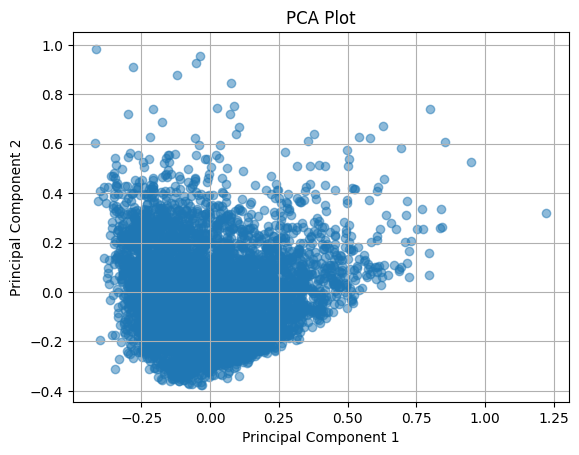

In [ ]:
## pca = PCA(n_components=2)

# Fit PCA to the scaled data
## pca.fit(scaled_train)

# Transform the data to its principal components
## transformed_data = pca.transform(scaled_train)

## plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.5)
## plt.xlabel('Principal Component 1')
## plt.ylabel('Principal Component 2')
## plt.title('PCA Plot')
## plt.grid()
## plt.show()

In [ ]:
# Correlation Matrix
correlation_matrix = scaled_train.corr()
correlation_matrix

Dwellings by Tenure Renter  \
Dwellings by Tenure Renter                                            1.000000   
Total Population                                                      0.356833   
Dwellings by Tenure Owner                                            -0.065196   
Total Households For Period Of Construction Bui...                    0.580351   
Total Households For Structure Type Houses                           -0.284160   
Total Households For Structure Type Apartment, ...                    0.922144   
Total Households For Period Of Construction Bui...                    0.141746   
Total Households For Period Of Construction Bui...                    0.271639   
Median Household Income (Current Year $)                             -0.584392   

                                                    Total Population  \
Dwellings by Tenure Renter                                  0.356833   
Total Population                                            1.000000   
Dwellings by Tenure Owner                                   0.842417   
Total Households For Period Of Construction Bui...          0.204681   
Total Households For Structure Type Houses                  0.688537   
Total Households For Structure Type Apartment, ...          0.309877   
Total Households For Period Of Construction Bui...          0.461852   
Total Households For Period Of Construction Bui...          0.587293   
Median Household Income (Current Year $)                    0.147750   

                                                    Dwellings by Tenure Owner  \
Dwellings by Tenure Renter                                          -0.065196   
Total Population                                                     0.842417   
Dwellings by Tenure Owner                                            1.000000   
Total Households For Period Of Construction Bui...                   0.005070   
Total Households For Structure Type Houses                           0.858735   
Total Households For Structure Type Apartment, ...                  -0.029468   
Total Households For Period Of Construction Bui...                   0.485353   
Total Households For Period Of Construction Bui...                   0.498834   
Median Household Income (Current Year $)                             0.358097   

                                                    Total Households For Period Of Construction Built Before_1980  \
Dwellings by Tenure Renter                                                                   0.580351               
Total Population                                                                             0.204681               
Dwellings by Tenure Owner                                                                    0.005070               
Total Households For Period Of Construction Bui...                                           1.000000               
Total Households For Structure Type Houses                                                  -0.034255               
Total Households For Structure Type Apartment, ...                                           0.455845               
Total Households For Period Of Construction Bui...                                          -0.097419               
Total Households For Period Of Construction Bui...                                          -0.215900               
Median Household Income (Current Year $)                                                    -0.473303               

                                                    Total Households For Structure Type Houses  \
Dwellings by Tenure Renter                                                           -0.284160   
Total Population                                                                      0.688537   
Dwellings by Tenure Owner                                                             0.858735   
Total Households For Period Of Construction Bui...                                   -0.034255   
Total Households For Structure Type Ho

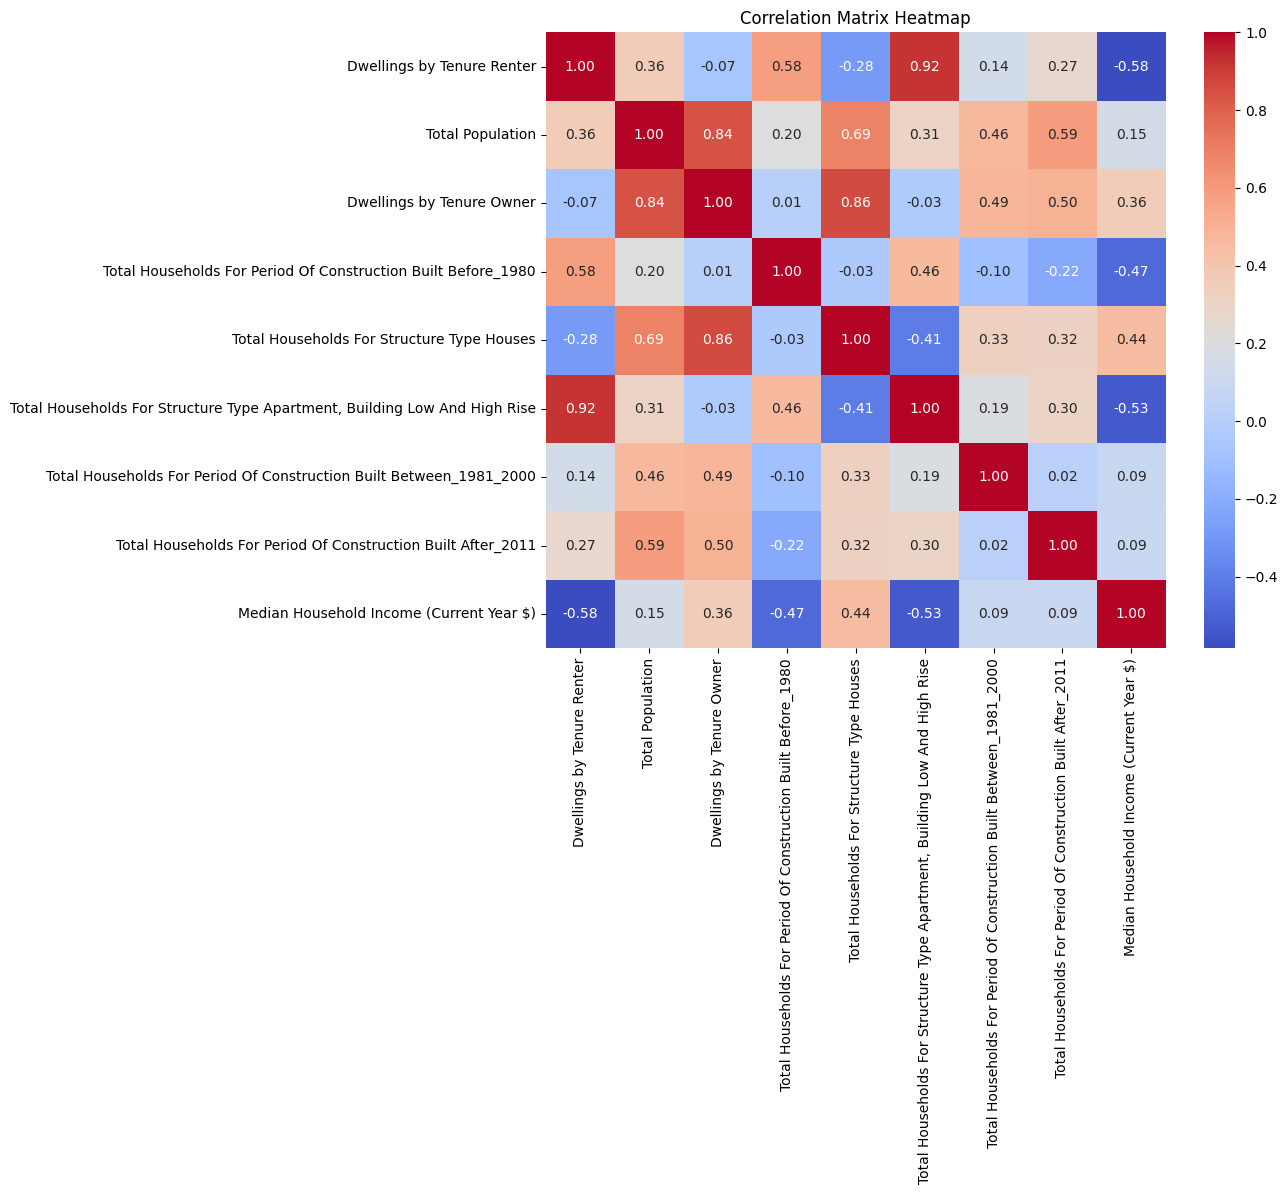

In [ ]:
# Visualization the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

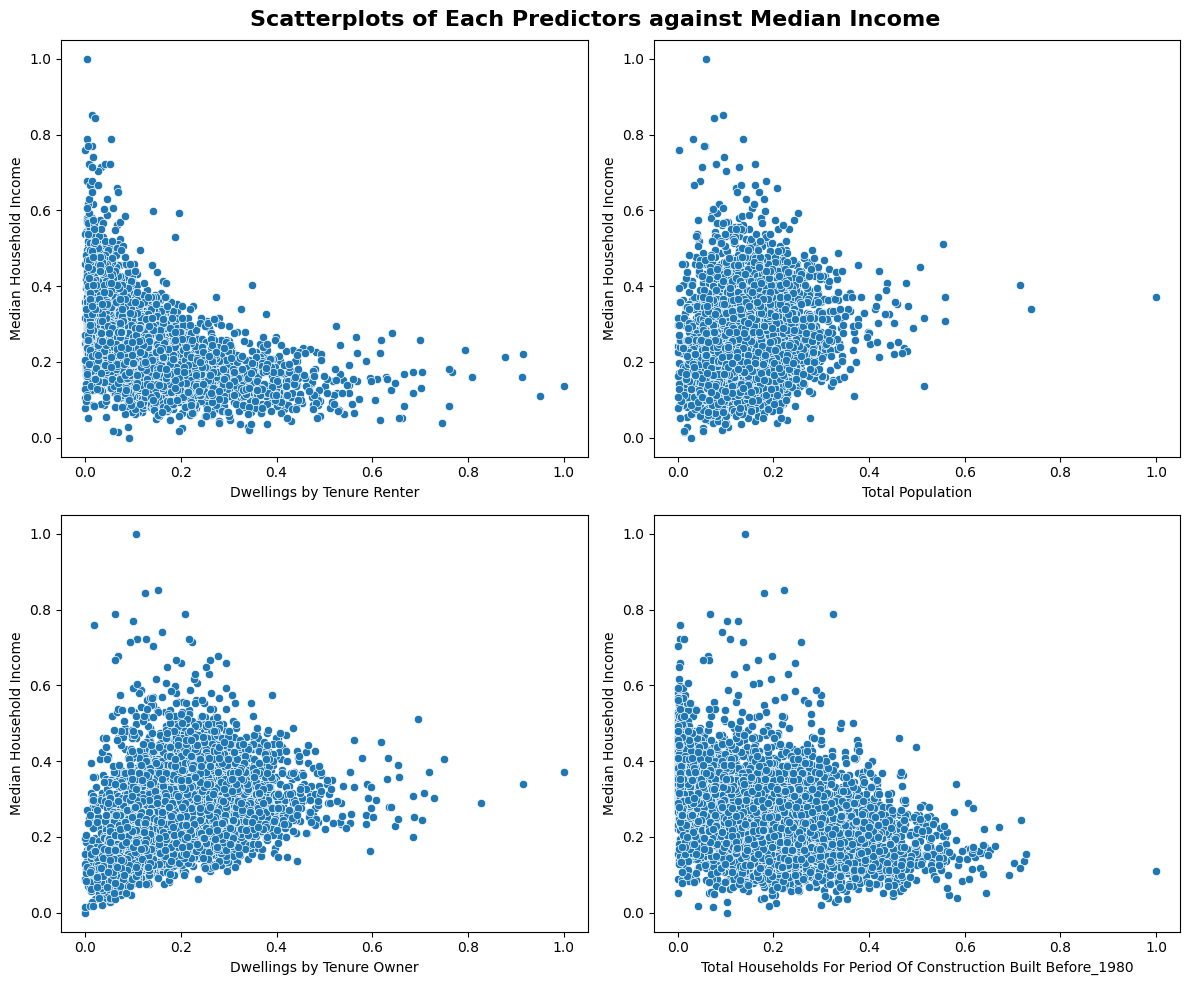

In [ ]:
# Creating scatterplots for each predictor against the target variable
predictors = X.columns.tolist()
target = 'Median Household Income (Current Year $)'

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Scatterplots of Each Predictors against Median Income', fontsize=16, fontweight='bold')

for i, predictor in enumerate(predictors[:4]):
    row = i // 2
    col = i % 2
    sns.scatterplot(x=scaled_train[predictor], y=scaled_train[target], ax=axs[row, col])
    axs[row, col].set_xlabel(predictor)
    axs[row, col].set_ylabel('Median Household Income')

plt.tight_layout()
plt.show()

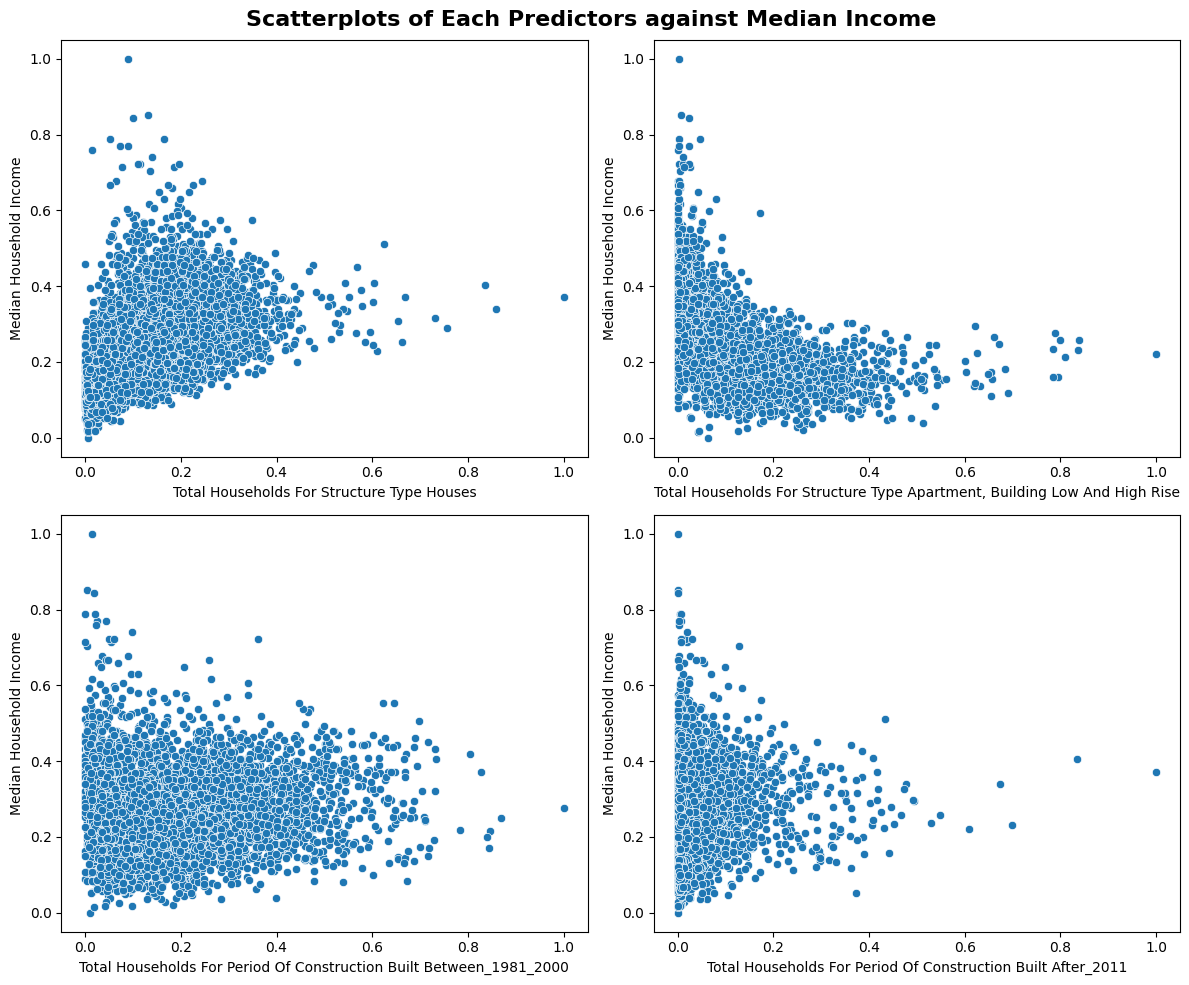

In [ ]:
# Creating scatterplots for each predictor against the target variable
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Scatterplots of Each Predictors against Median Income ', fontsize=16, fontweight='bold')

for i, predictor in enumerate(predictors[4:8]):
    row = i // 2
    col = i % 2
    sns.scatterplot(x=scaled_train[predictor], y=scaled_train[target], ax=axs[row, col])
    axs[row, col].set_xlabel(predictor)
    axs[row, col].set_ylabel('Median Household Income')

plt.tight_layout()
plt.show()

## Clustering

### Find optimal K

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.24843149178062926
For n_clusters = 3 The average silhouette_score is : 0.2566553074233015
For n_clusters = 4 The average silhouette_score is : 0.24094441754003834
For n_clusters = 5 The average silhouette_score is : 0.21769168564274718
For n_clusters = 6 The average silhouette_score is : 0.2230014208199213
For n_clusters = 7 The average silhouette_score is : 0.2264269548617087
For n_clusters = 8 The average silhouette_score is : 0.21008354840093754
For n_clusters = 9 The average silhouette_score is : 0.20182751691735393
For n_clusters = 10 The average silhouette_score is : 0.19783498269957184


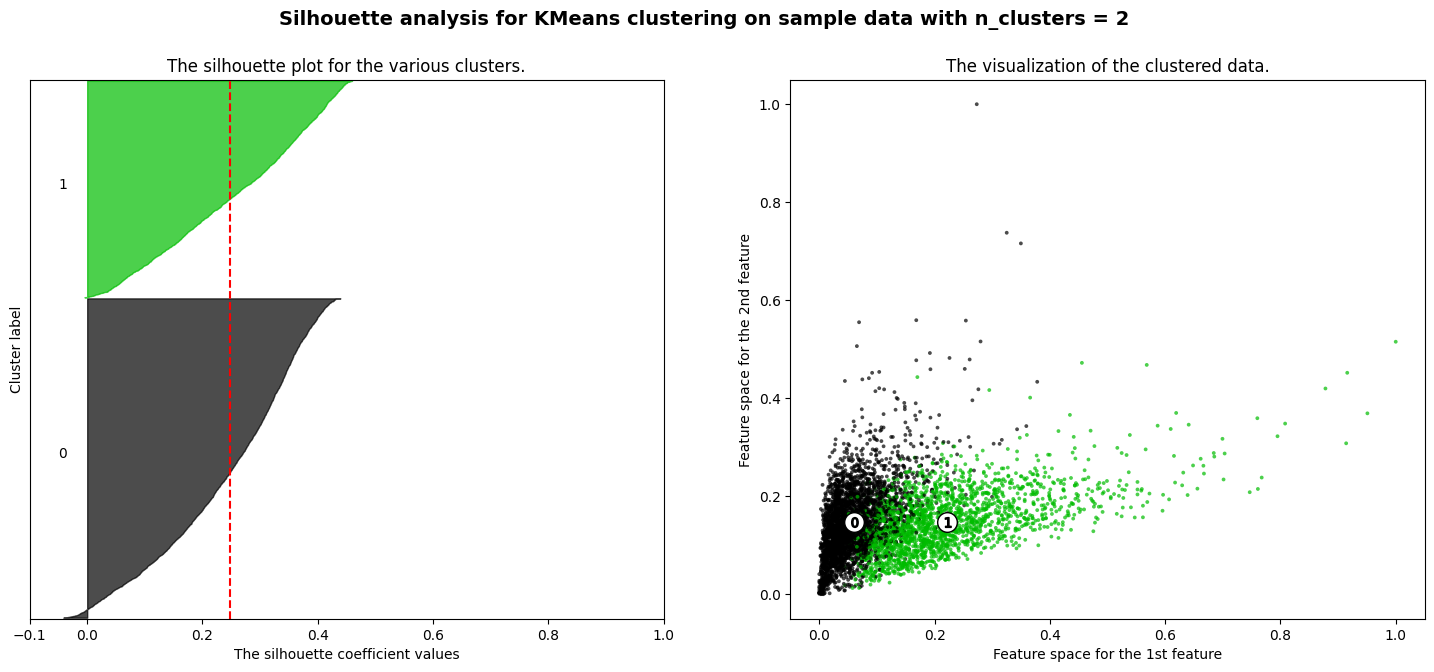

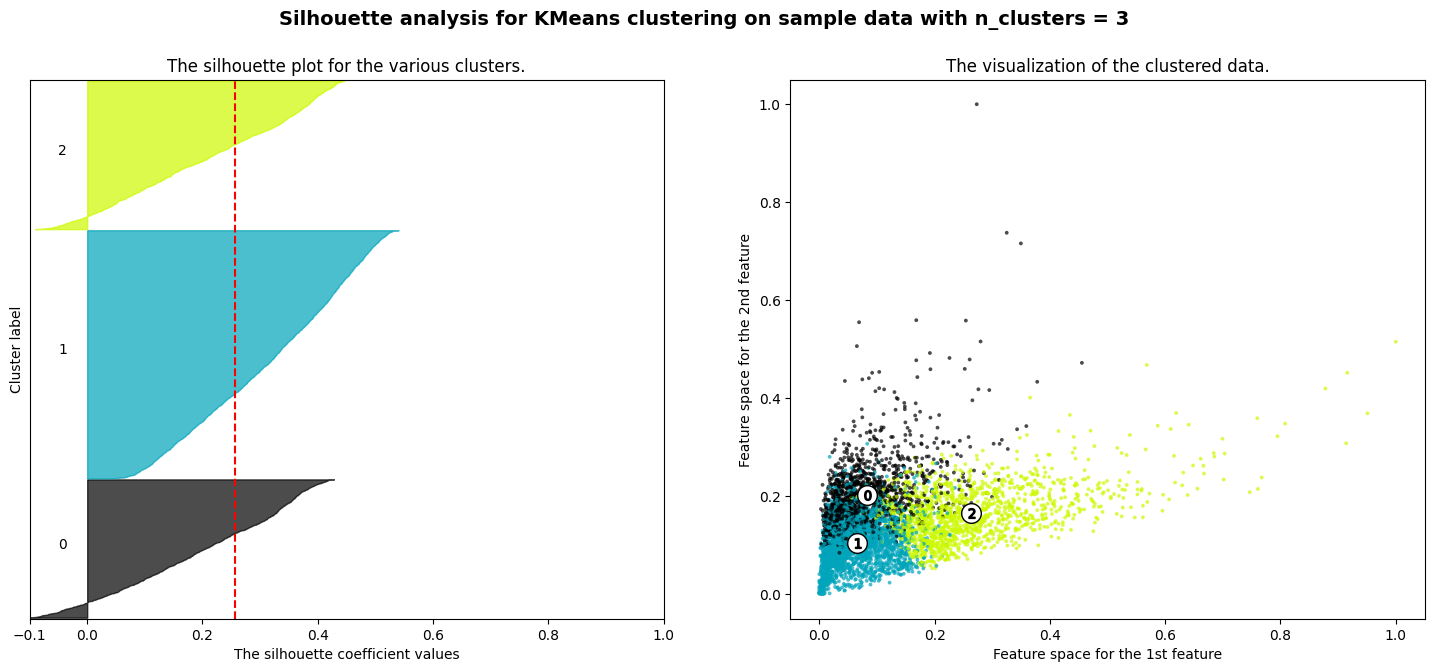

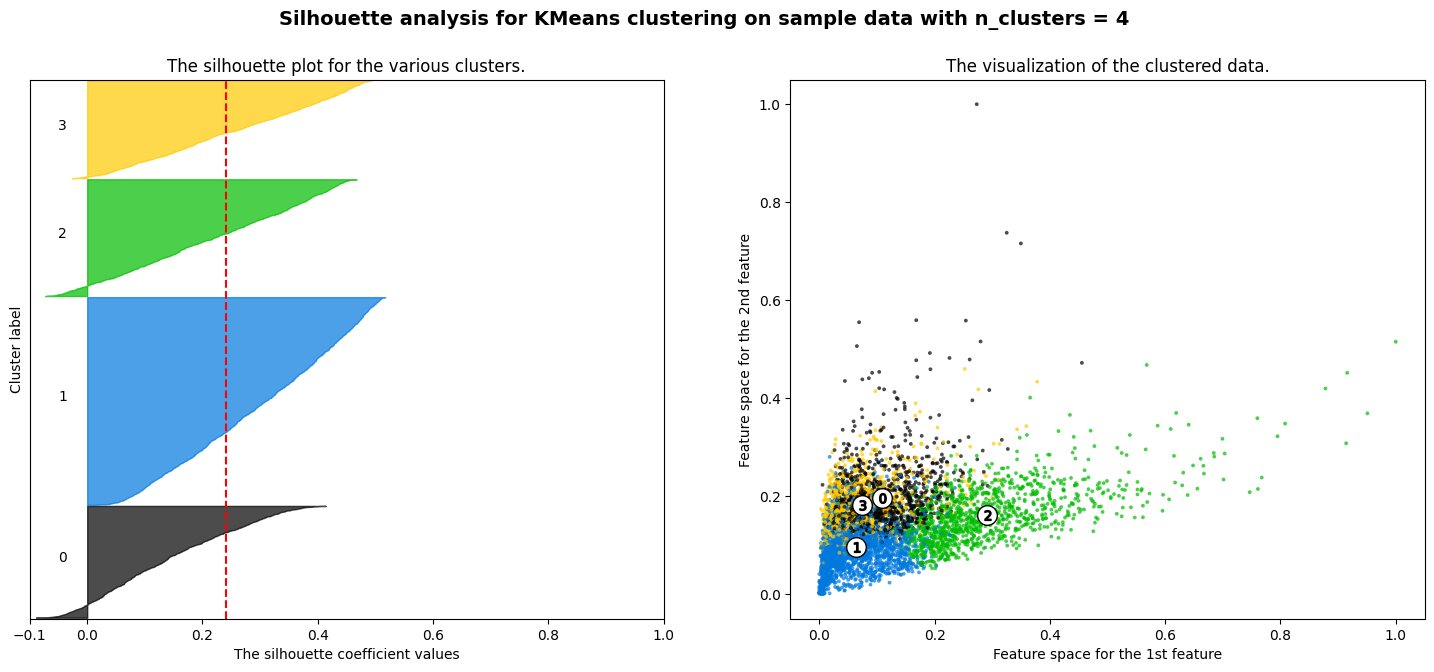

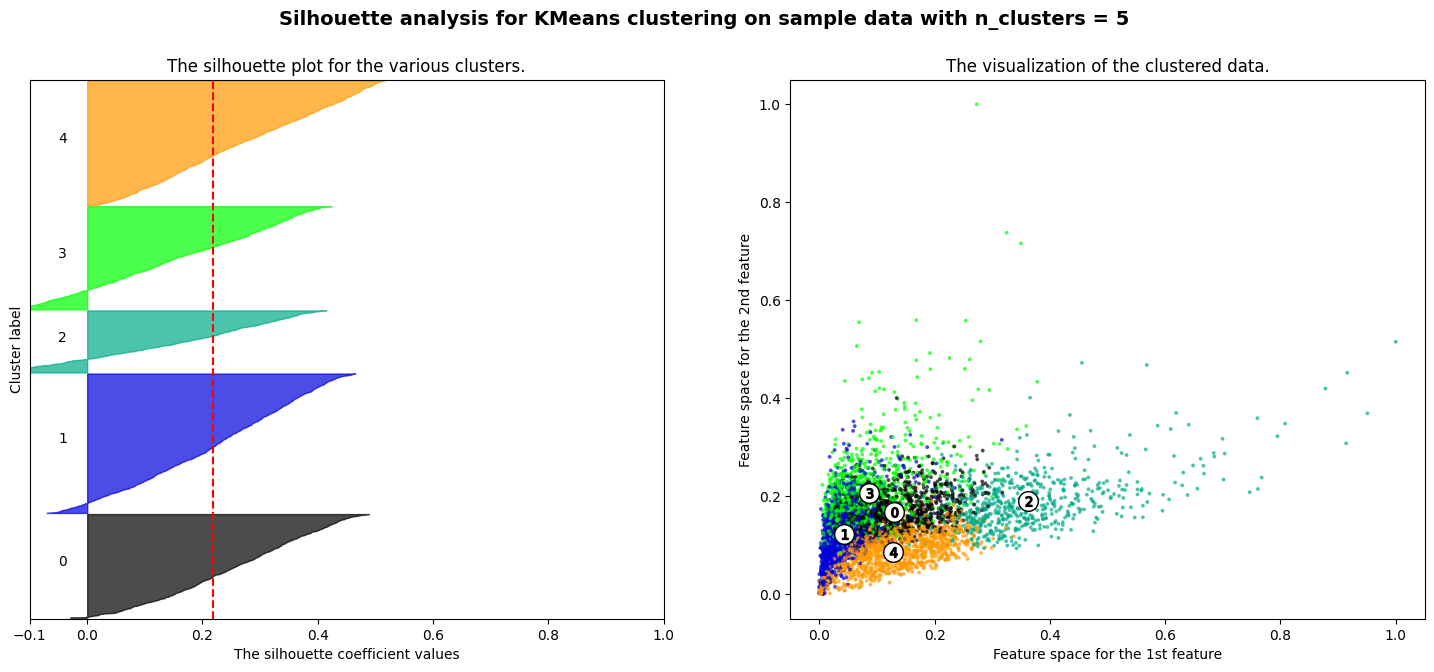

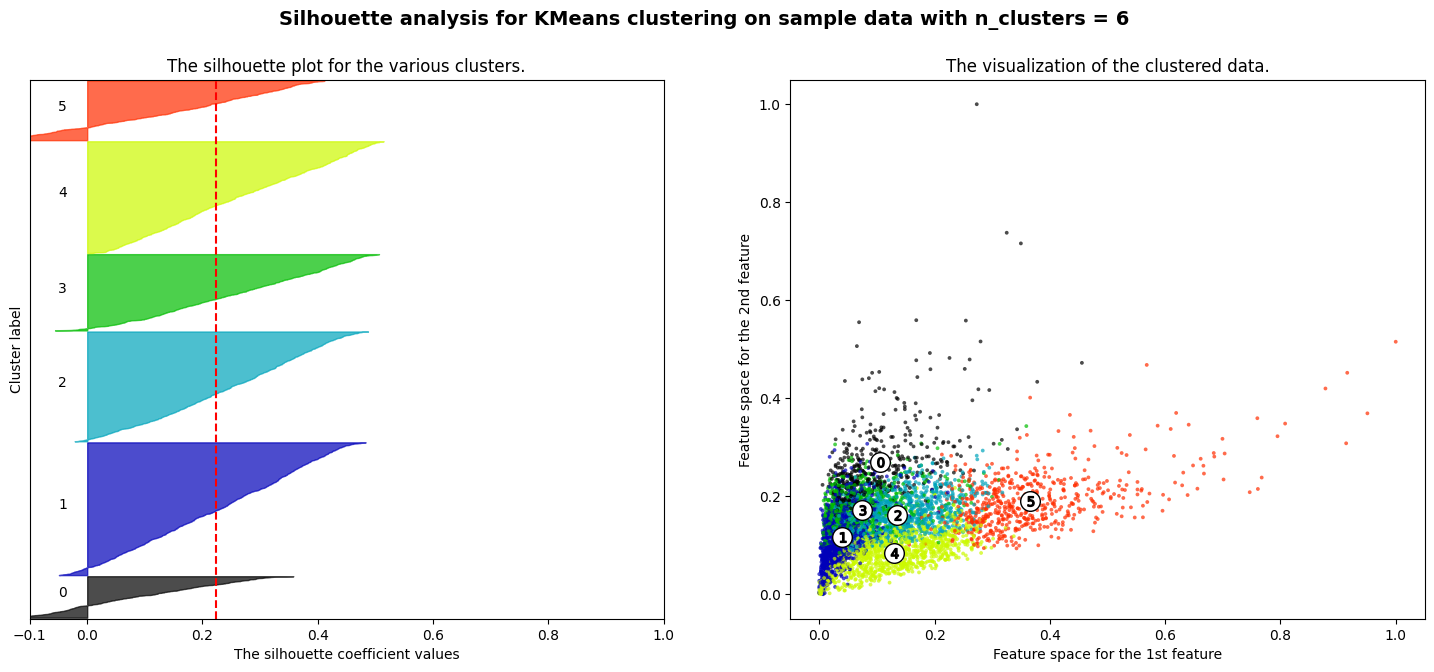

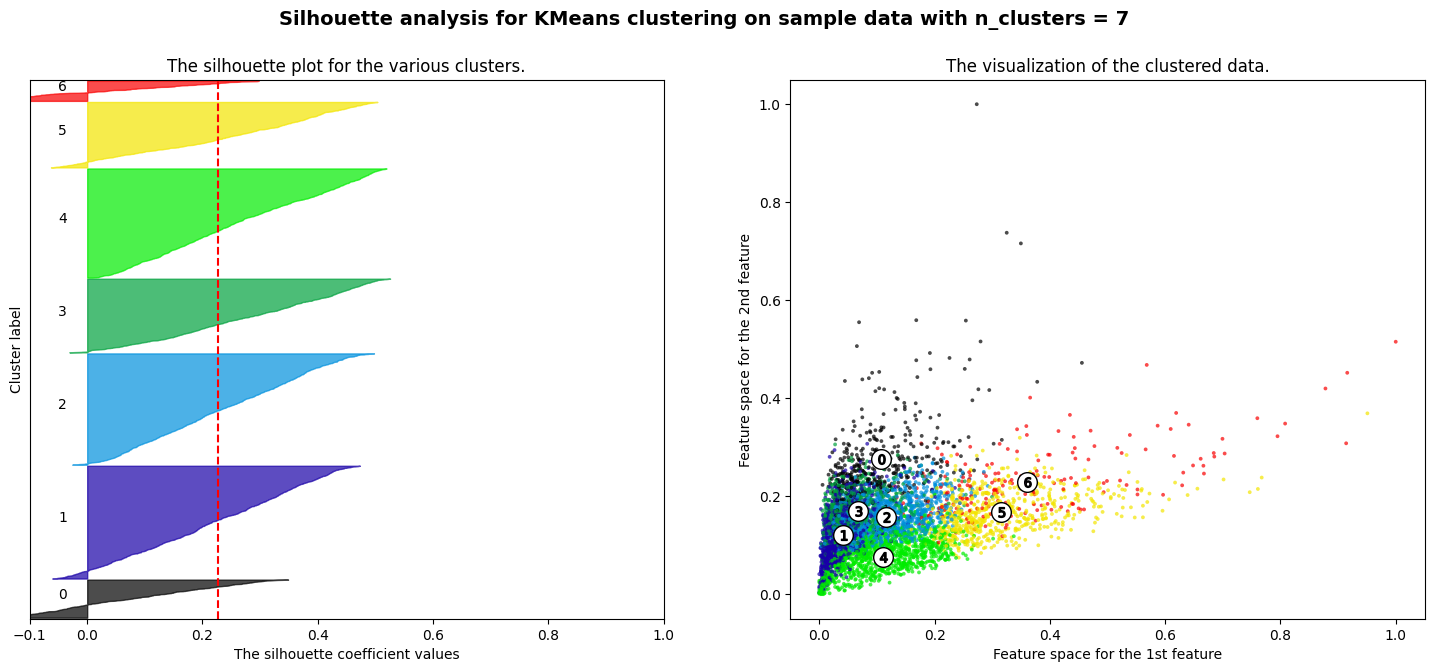

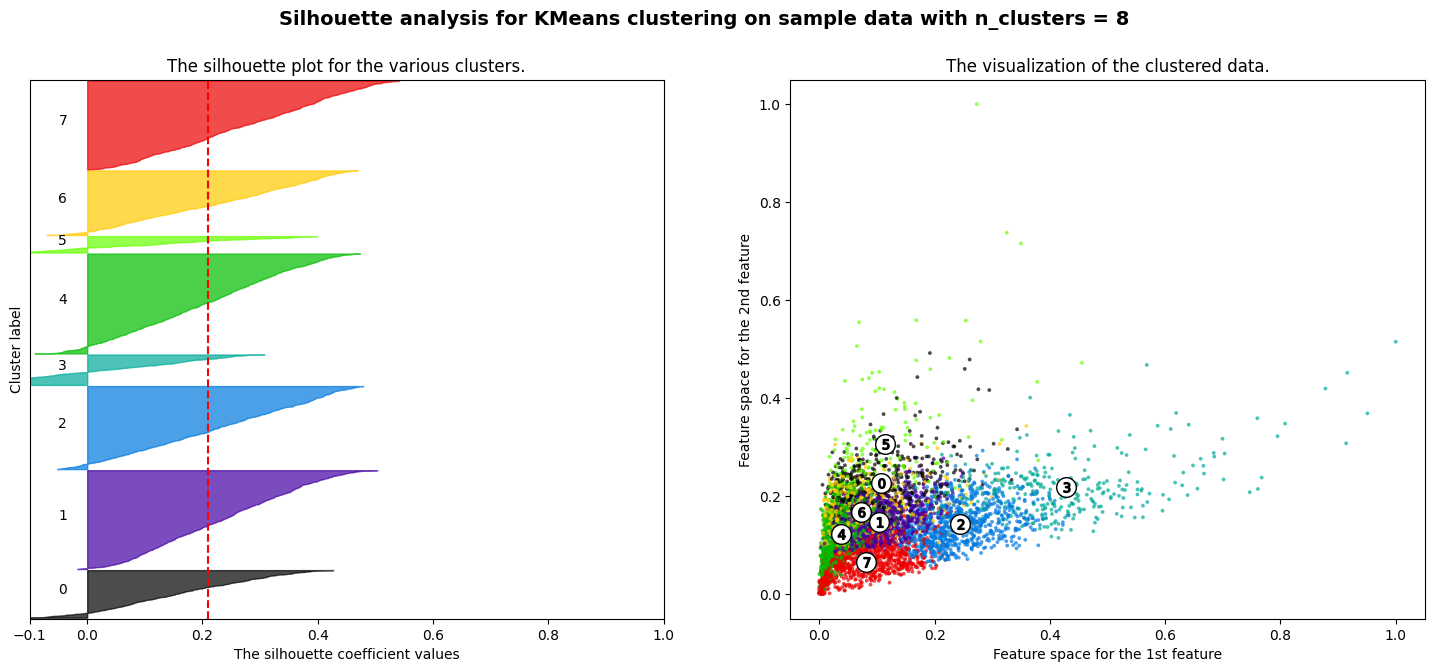

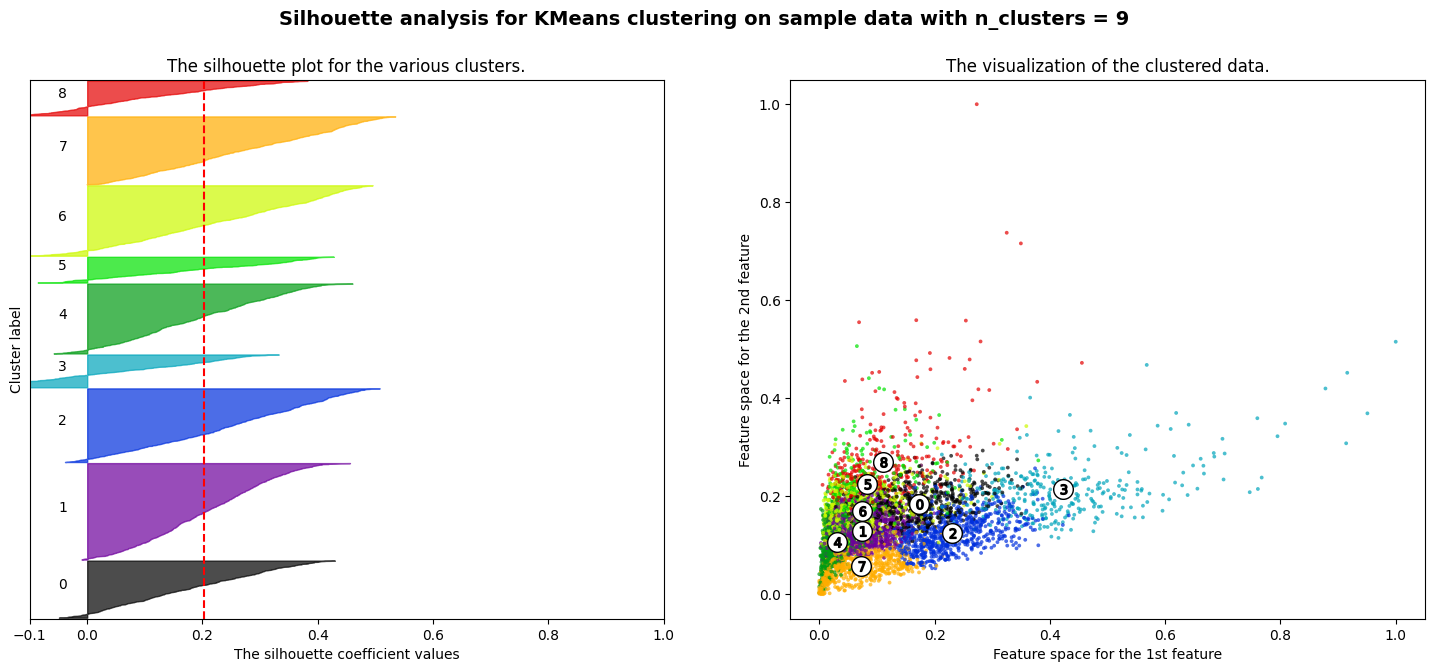

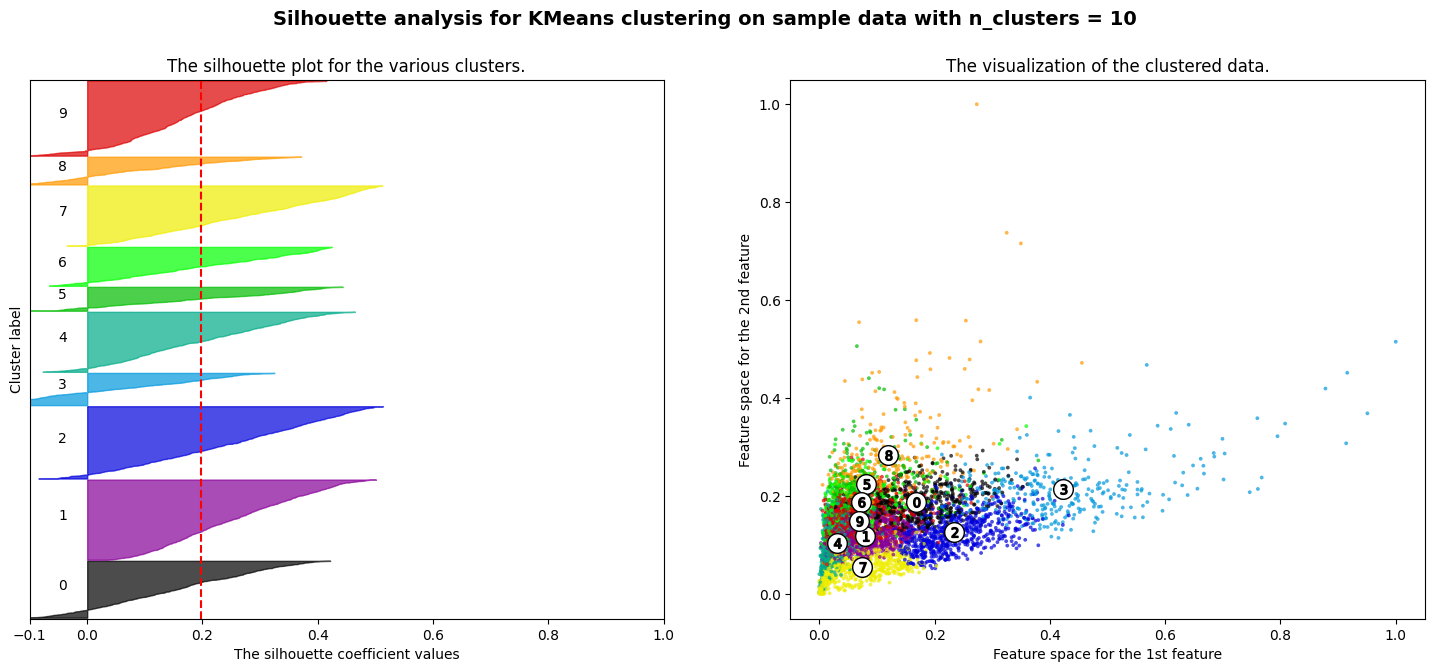

In [ ]:
# Perform Silhouette analysis to find the best K for KMeans

range_n_clusters = range(2,11)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_train, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        scaled_train.iloc[:,0].values, scaled_train.iloc[:,1].values, marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Text(0, 0.5, 'inertia')

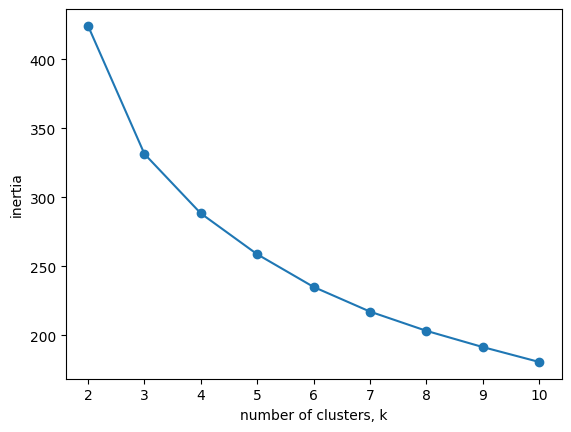

In [ ]:
ks = range(2,11)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(scaled_train)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')

### KMeans Clustering

In [ ]:
kmeans_model_part1 = KMeans(n_clusters=3, n_init=10, random_state=10)
cluster_numbers_part1 = kmeans_model_part1.fit_predict(scaled_train)
cluster_labels_part1 = [str(c) for c in cluster_numbers_part1]
fig = px.scatter(scaled_train.values, color=cluster_labels_part1)
fig.update_traces(marker=dict(size=5))
fig.show()

In [ ]:
kmeans_train_part1 = scaled_train.copy()
kmeans_train_part1['KMeans Cluster Label']=cluster_numbers_part1
kmeans_train_part1.head(6)

Dwellings by Tenure Renter  Total Population  Dwellings by Tenure Owner  \
0                    0.034026          0.095977                   0.173520   
1                    0.056711          0.191239                   0.224507   
2                    0.079395          0.266095                   0.388158   
3                    0.075614          0.129511                   0.226151   
4                    0.026465          0.114818                   0.205592   
5                    0.034972          0.096793                   0.157895   

   Total Households For Period Of Construction Built Before_1980  \
0                                           0.266744               
1                                           0.000000               
2                                           0.058891               
3                                           0.302540               
4                                           0.046189               
5                                           0.175520               

   Total Households For Structure Type Houses  \
0                                    0.158409   
1                                    0.224006   
2                                    0.331472   
3                                    0.176553   
4                                    0.144452   
5                                    0.158409   

   Total Households For Structure Type Apartment, Building Low And High Rise  \
0                                           0.016603                           
1                                           0.006386                           
2                                           0.051086                           
3                                           0.035121                           
4                                           0.041507                           
5                                           0.000000                           

   Total Households For Period Of Construction Built Between_1981_2000  \
0                                           0.024528                     
1                                           0.005660                     
2                                           0.547170                     
3                                           0.130189                     
4                                           0.443396                     
5                                           0.133962                     

   Total Households For Period Of Construction Built After_2011  \
0                                           0.000000              
1                                           0.170532              
2                                           0.049113              
3                                           0.006139              
4                                           0.001364              
5                                           0.002046              

   Median Household Income (Current Year $)  KMeans Cluster Label  
0                                  0.385965                     2  
1                                  0.404432                     2  
2                                  0.376731                     0  
3                                  0.192059                     2  
4                                  0.358264                     0  
5                                  0.353647                     2

### Detailed Clusters Profile

In [ ]:
# Split the df based on different cluster lable
cluster0_part1 = kmeans_train_part1[kmeans_train_part1['KMeans Cluster Label'] == 0]
cluster0_part1.reset_index(drop=True, inplace=True)

cluster1_part1 = kmeans_train_part1[kmeans_train_part1['KMeans Cluster Label'] == 1]
cluster1_part1.reset_index(drop=True, inplace=True)

cluster2_part1 = kmeans_train_part1[kmeans_train_part1['KMeans Cluster Label'] == 2]
cluster2_part1.reset_index(drop=True, inplace=True)

In [ ]:
# Unscaled df with cluster label
original_data_part1 = scaler.inverse_transform(kmeans_train_part1.iloc[:, :-1])
original_dftrain_part1 = pd.DataFrame(original_data_part1, columns=scaled_train.columns.tolist())
original_dftrain_part1['KMeans Cluster Label']=cluster_numbers_part1
## original_dftrain_part1 = original_dftrain.drop('Median Household Income (Current Year $)', axis = 1)

# Unscaled df for each label
original_cluster0_part1 = original_dftrain_part1[original_dftrain_part1['KMeans Cluster Label'] == 0]
original_cluster1_part1 = original_dftrain_part1[original_dftrain_part1['KMeans Cluster Label'] == 1]
original_cluster2_part1 = original_dftrain_part1[original_dftrain_part1['KMeans Cluster Label'] == 2]

original_dftrain_part1.head(6)

Dwellings by Tenure Renter  Total Population  Dwellings by Tenure Owner  \
0                       180.0            3088.0                     1055.0   
1                       300.0            5889.0                     1365.0   
2                       420.0            8090.0                     2360.0   
3                       400.0            4074.0                     1375.0   
4                       140.0            3642.0                     1250.0   
5                       185.0            3112.0                      960.0   

   Total Households For Period Of Construction Built Before_1980  \
0                                             1155.0               
1                                                0.0               
2                                              255.0               
3                                             1310.0               
4                                              200.0               
5                                              760.0               

   Total Households For Structure Type Houses  \
0                                      1135.0   
1                                      1605.0   
2                                      2375.0   
3                                      1265.0   
4                                      1035.0   
5                                      1135.0   

   Total Households For Structure Type Apartment, Building Low And High Rise  \
0                                              130.0                           
1                                               50.0                           
2                                              400.0                           
3                                              275.0                           
4                                              325.0                           
5                                                0.0                           

   Total Households For Period Of Construction Built Between_1981_2000  \
0                                               65.0                     
1                                               15.0                     
2                                             1450.0                     
3                                              345.0                     
4                                             1175.0                     
5                                              355.0                     

   Total Households For Period Of Construction Built After_2011  \
0                                                0.0              
1                                             1250.0              
2                                              360.0              
3                                               45.0              
4                                               10.0              
5                                               15.0              

   Median Household Income (Current Year $)  KMeans Cluster Label  
0                                  107000.0                     2  
1                                  111000.0                     2  
2                                  105000.0                     0  
3                                   65000.0                     2  
4                                  101000.0                     0  
5                                  100000.0                     2

In [ ]:
aggregate_mean = original_dftrain_part1.groupby('KMeans Cluster Label').mean()
aggregate_mean

Dwellings by Tenure Renter  Total Population  \
KMeans Cluster Label                                                 
0                                     439.981658       6232.480558   
1                                    1403.155880       5128.818372   
2                                     349.231084       3368.110838   

                      Dwellings by Tenure Owner  \
KMeans Cluster Label                              
0                                   1836.826853   
1                                    996.503132   
2                                    904.932515   

                      Total Households For Period Of Construction Built Before_1980  \
KMeans Cluster Label                                                                  
0                                                            571.507704               
1                                                           1461.496173               
2                                                            631.165644               

                      Total Households For Structure Type Houses  \
KMeans Cluster Label                                               
0                                                    1791.973588   
1                                                     690.817676   
2                                                     892.233129   

                      Total Households For Structure Type Apartment, Building Low And High Rise  \
KMeans Cluster Label                                                                              
0                                                            460.575935                           
1                                                           1706.165623                           
2                                                            353.032720                           

                      Total Households For Period Of Construction Built Between_1981_2000  \
KMeans Cluster Label                                                                        
0                                                            904.134263                     
1                                                            461.534447                     
2                                                            232.738241                     

                      Total Households For Period Of Construction Built After_2011  \
KMeans Cluster Label                                                                 
0                                                            382.142333              
1                                                            272.080724              
2                                                            187.627812              

                      Median Household Income (Current Year $)  
KMeans Cluster Label                                            
0                                                 93294.570800  
1                                                 60172.581768  
2                                                 85193.701431

In [ ]:
aggregate_std = original_dftrain_part1.groupby('KMeans Cluster Label').std()
aggregate_std

Dwellings by Tenure Renter  Total Population  \
KMeans Cluster Label                                                 
0                                     325.607277       2127.392258   
1                                     624.986553       1606.669599   
2                                     242.091359       1408.494353   

                      Dwellings by Tenure Owner  \
KMeans Cluster Label                              
0                                    597.037997   
1                                    522.522876   
2                                    414.004047   

                      Total Households For Period Of Construction Built Before_1980  \
KMeans Cluster Label                                                                  
0                                                            485.490220               
1                                                            513.463974               
2                                                            467.502408               

                      Total Households For Structure Type Houses  \
KMeans Cluster Label                                               
0                                                     703.202002   
1                                                     560.151730   
2                                                     460.179267   

                      Total Households For Structure Type Apartment, Building Low And High Rise  \
KMeans Cluster Label                                                                              
0                                                            514.522948                           
1                                                            925.832973                           
2                                                            337.397852                           

                      Total Households For Period Of Construction Built Between_1981_2000  \
KMeans Cluster Label                                                                        
0                                                            375.270073                     
1                                                            301.230579                     
2                                                            184.084569                     

                      Total Households For Period Of Construction Built After_2011  \
KMeans Cluster Label                                                                 
0                                                            587.970791              
1                                                            495.069864              
2                                                            310.470474              

                      Median Household Income (Current Year $)  
KMeans Cluster Label                                            
0                                                 17867.872049  
1                                                 12298.427661  
2                                                 23755.658668

#### Visualization

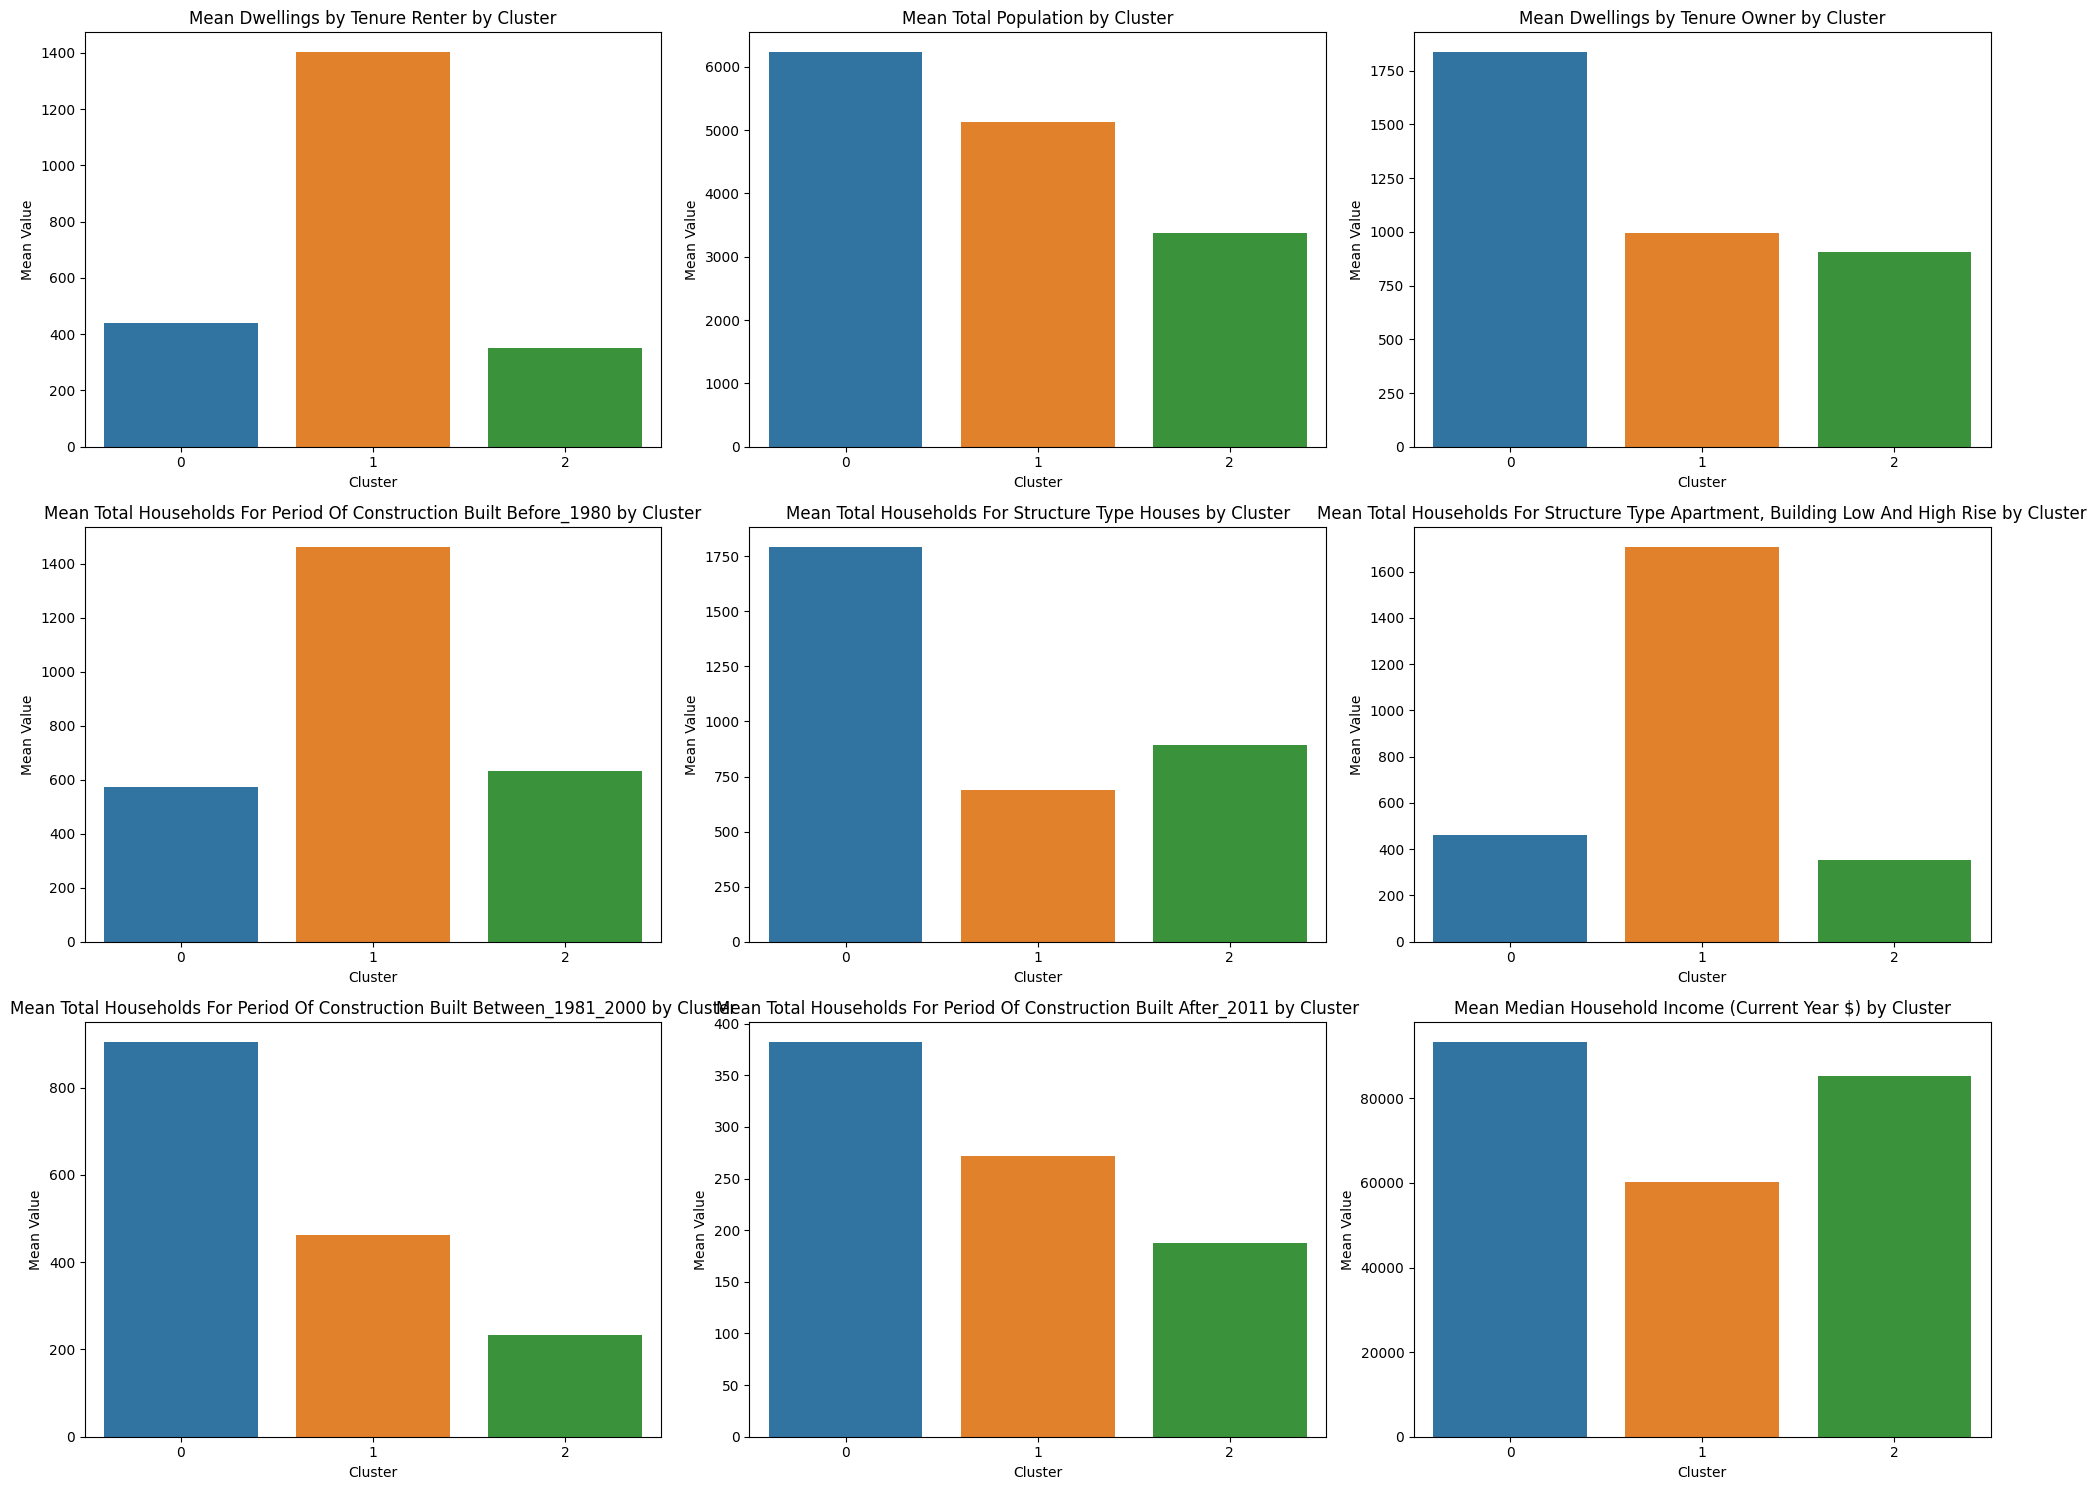

In [ ]:
# Bar Plot of the aggregated mean fields by cluster
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes_flat = axes.flatten()

for i, column in enumerate(aggregate_mean.columns):
    sns.barplot(ax=axes_flat[i], x=aggregate_mean.index, y=aggregate_mean[column])
    axes_flat[i].set_title(f'Mean {column} by Cluster')
    axes_flat[i].set_xlabel('Cluster')
    axes_flat[i].set_ylabel(f'Mean Value')

plt.tight_layout()
plt.show()

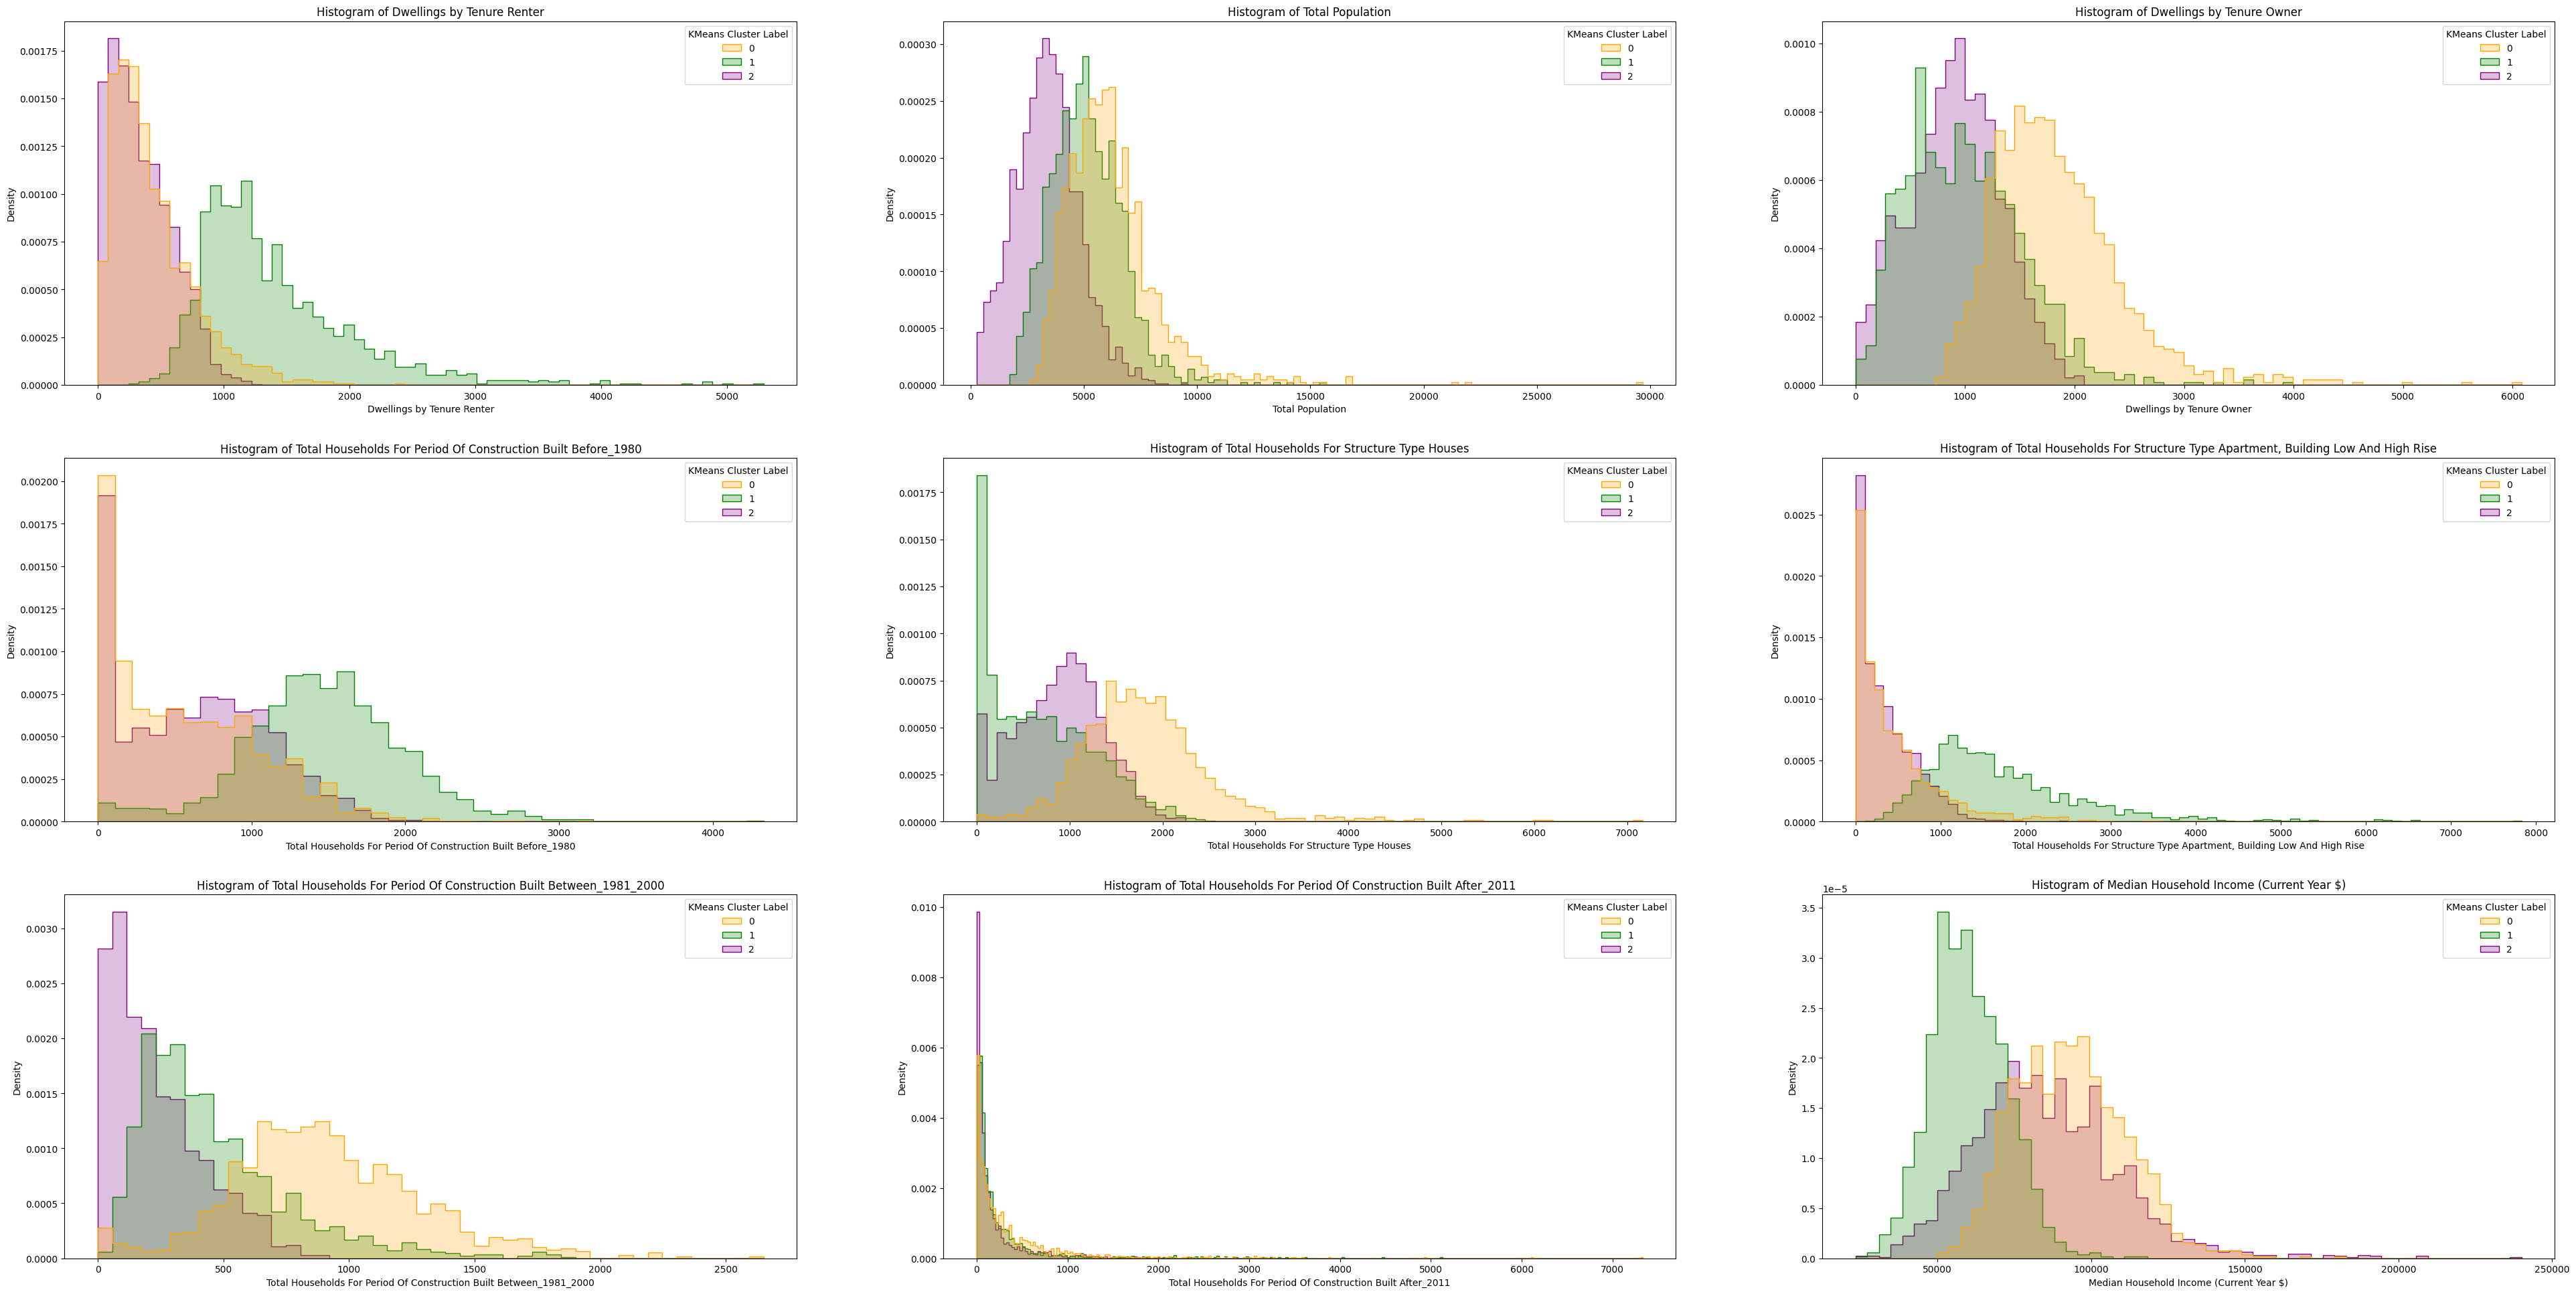

In [ ]:
# Cluster Distributions for Each Variables
plt.figure(figsize=(48, 24))
for i, feature in enumerate(original_dftrain_part1.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(original_dftrain_part1, x=feature, hue='KMeans Cluster Label', element='step', stat='density', common_norm=False, palette=["orange", "green", "purple"])
    plt.title(f'Histogram of {feature}')


### BIRCH Clustering

In [ ]:
from sklearn.cluster import Birch

In [ ]:
birch_model = Birch(n_clusters=3, threshold=0.01)
birch_cluster_numbers = birch_model.fit_predict(scaled_train)

In [ ]:
kmeans_silhouette = silhouette_score(scaled_train, cluster_numbers_part1)
birch_silhouette = silhouette_score(scaled_train, birch_cluster_numbers)
print(f"KMeans Silhouette Score: {kmeans_silhouette}")
print(f"BIRCH Silhouette Score: {birch_silhouette}")

KMeans Silhouette Score: 0.25673420224134036
BIRCH Silhouette Score: 0.2560147853788463


In [ ]:
comparison = pd.DataFrame({'KMeans_Cluster': cluster_numbers_part1, 'BIRCH_Cluster': birch_cluster_numbers})
comparison

KMeans_Cluster  BIRCH_Cluster
0                  2              0
1                  2              0
2                  0              2
3                  2              0
4                  0              2
...              ...            ...
5240               2              0
5241               1              1
5242               2              0
5243               2              0
5244               1              1

[5245 rows x 2 columns]

In [ ]:
kmeans_counts = comparison['KMeans_Cluster'].value_counts().sort_index()
birch_counts = comparison['BIRCH_Cluster'].value_counts().sort_index()

plot_data = pd.DataFrame({'KMeans': kmeans_counts, 'BIRCH': birch_counts})
plot_data

KMeans  BIRCH
0    1363   3545
1    1437    686
2    2445   1014

from matplotlib import pyplot as plt
plot_data['KMeans'].plot(kind='hist', bins=20, title='KMeans')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
plot_data['BIRCH'].plot(kind='hist', bins=20, title='BIRCH')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
plot_data.plot(kind='scatter', x='KMeans', y='BIRCH', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['KMeans']
  ys = series['BIRCH']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = plot_data.sort_values('KMeans', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('KMeans')
_ = plt.ylabel('BIRCH')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['KMeans']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'KMeans'}, axis=1)
              .sort_values('KMeans', ascending=True))
  xs = counted['KMeans']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = plot_data.sort_values('KMeans', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('KMeans')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
plot_data['KMeans'].plot(kind='line', figsize=(8, 4), title='KMeans')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
plot_data['BIRCH'].plot(kind='line', figsize=(8, 4), title='BIRCH')
plt.gca().spines[['top', 'right']].set_visible(False)

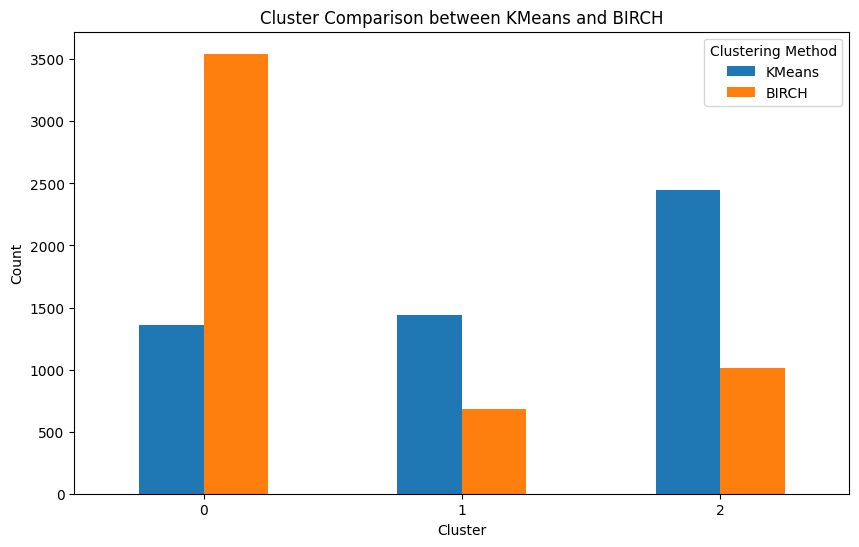

In [ ]:
plot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Comparison between KMeans and BIRCH')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Clustering Method')
plt.show()

In [ ]:
kmeans_zero_count = (comparison['KMeans_Cluster'] == 0).sum()
kmeans_one_count = (comparison['KMeans_Cluster'] == 1).sum()
kmeans_two_count = (comparison['KMeans_Cluster'] == 2).sum()
birch_zero_count = (comparison['BIRCH_Cluster'] == 0).sum()
birch_one_count = (comparison['BIRCH_Cluster'] == 1).sum()
birch_two_count = (comparison['BIRCH_Cluster'] == 2).sum()

print("Count of 0 in KMeans_Cluster:", kmeans_zero_count)
print("Count of 0 in BIRCH_Cluster:", birch_zero_count)

print("Count of 1 in KMeans_Cluster:", kmeans_one_count)
print("Count of 1 in BIRCH_Cluster:", birch_one_count)

print("Count of 2 in KMeans_Cluster:", kmeans_two_count)
print("Count of 2 in BIRCH_Cluster:", birch_two_count)

Count of 0 in KMeans_Cluster: 1363
Count of 0 in BIRCH_Cluster: 3545
Count of 1 in KMeans_Cluster: 1437
Count of 1 in BIRCH_Cluster: 686
Count of 2 in KMeans_Cluster: 2445
Count of 2 in BIRCH_Cluster: 1014


In [ ]:
# Similarties and Differences between two method for KMeans
similarties_per_column = (comparison['KMeans_Cluster'] == comparison['BIRCH_Cluster']).groupby(comparison['KMeans_Cluster']).sum()
differences_per_column = (comparison['KMeans_Cluster'] != comparison['BIRCH_Cluster']).groupby(comparison['KMeans_Cluster']).sum()

print("Total Number of Similarties between KMeans_Cluster and BIRCH_Cluster:", similarties_per_column)
print("Total Number of differences between KMeans_Cluster and BIRCH_Cluster:", differences_per_column)

Total Number of Similarties between KMeans_Cluster and BIRCH_Cluster: KMeans_Cluster
0    326
1    639
2      3
dtype: int64
Total Number of differences between KMeans_Cluster and BIRCH_Cluster: KMeans_Cluster
0    1037
1     798
2    2442
dtype: int64


# **Part 2**

## Clustering

### Find Optimal K

For n_clusters = 2 The average silhouette_score is : 0.27014030331086686
For n_clusters = 3 The average silhouette_score is : 0.28973214983189166
For n_clusters = 4 The average silhouette_score is : 0.27166480431676177
For n_clusters = 5 The average silhouette_score is : 0.2508055178770374
For n_clusters = 6 The average silhouette_score is : 0.2520830170580394
For n_clusters = 7 The average silhouette_score is : 0.24875284690059704
For n_clusters = 8 The average silhouette_score is : 0.24944594202682352
For n_clusters = 9 The average silhouette_score is : 0.25329535130173597
For n_clusters = 10 The average silhouette_score is : 0.24815183532039506


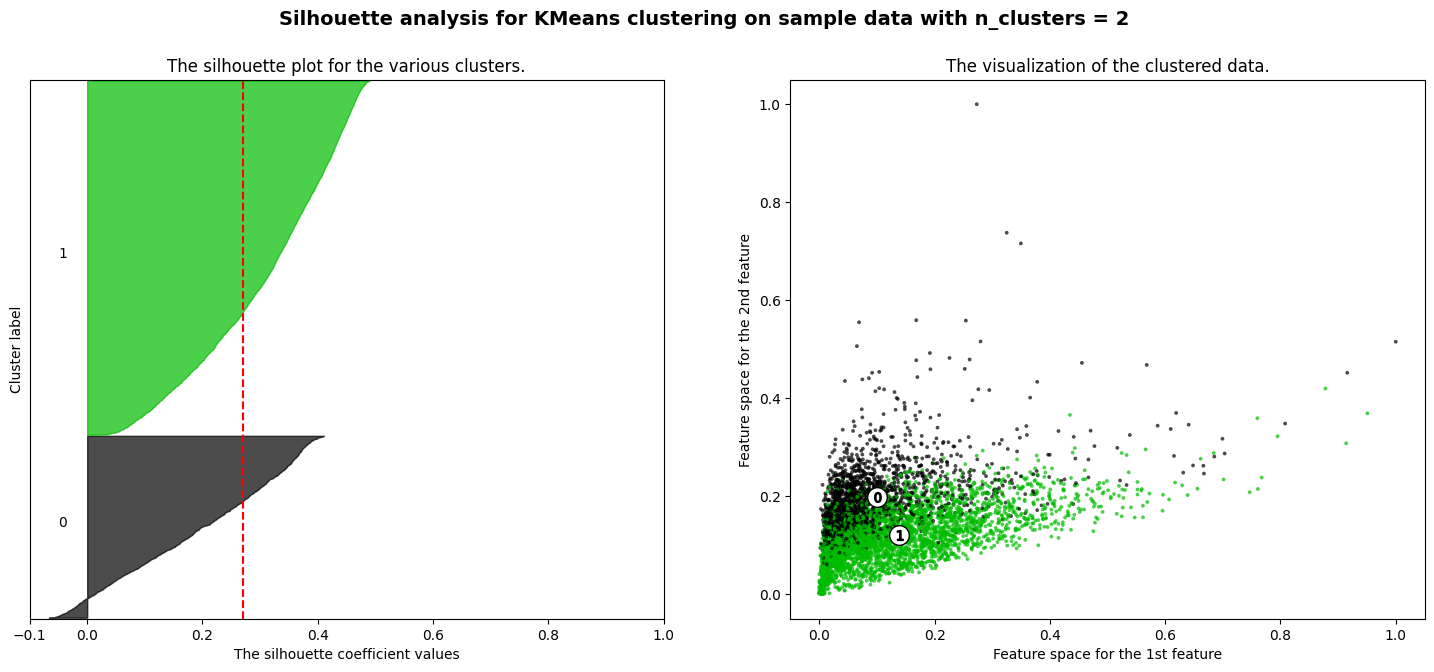

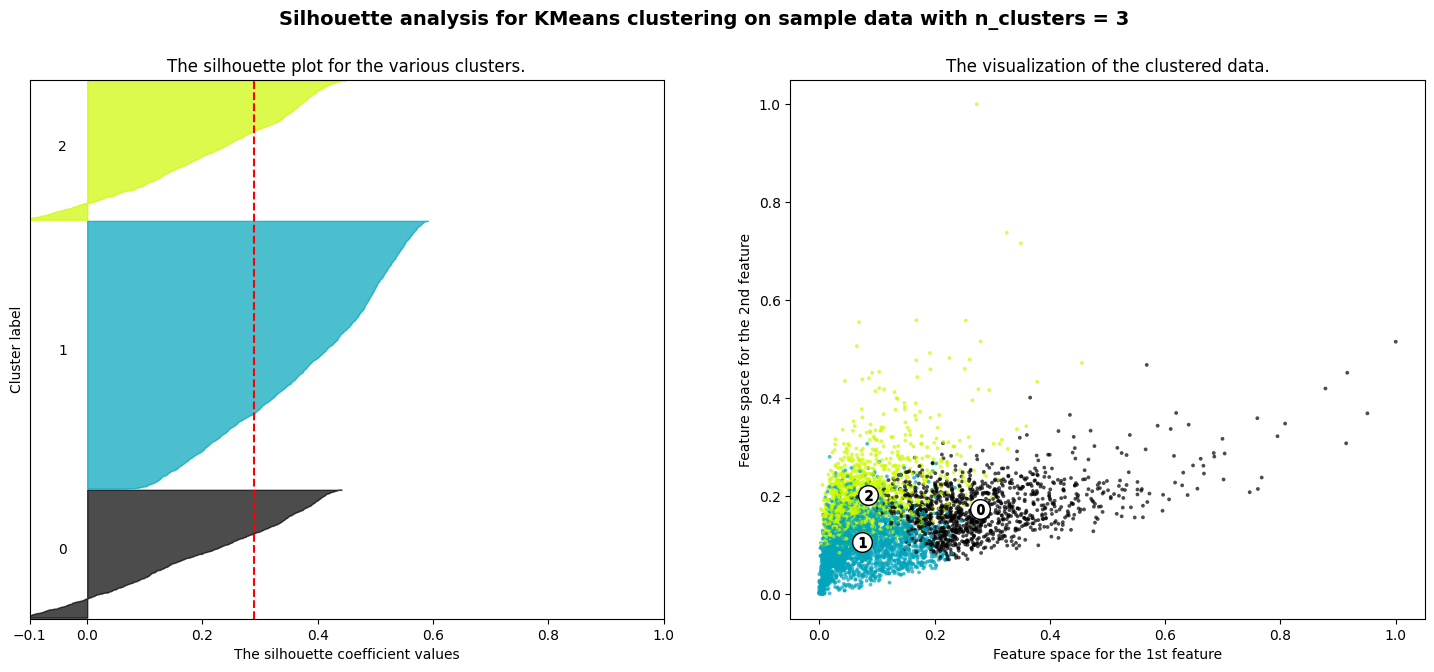

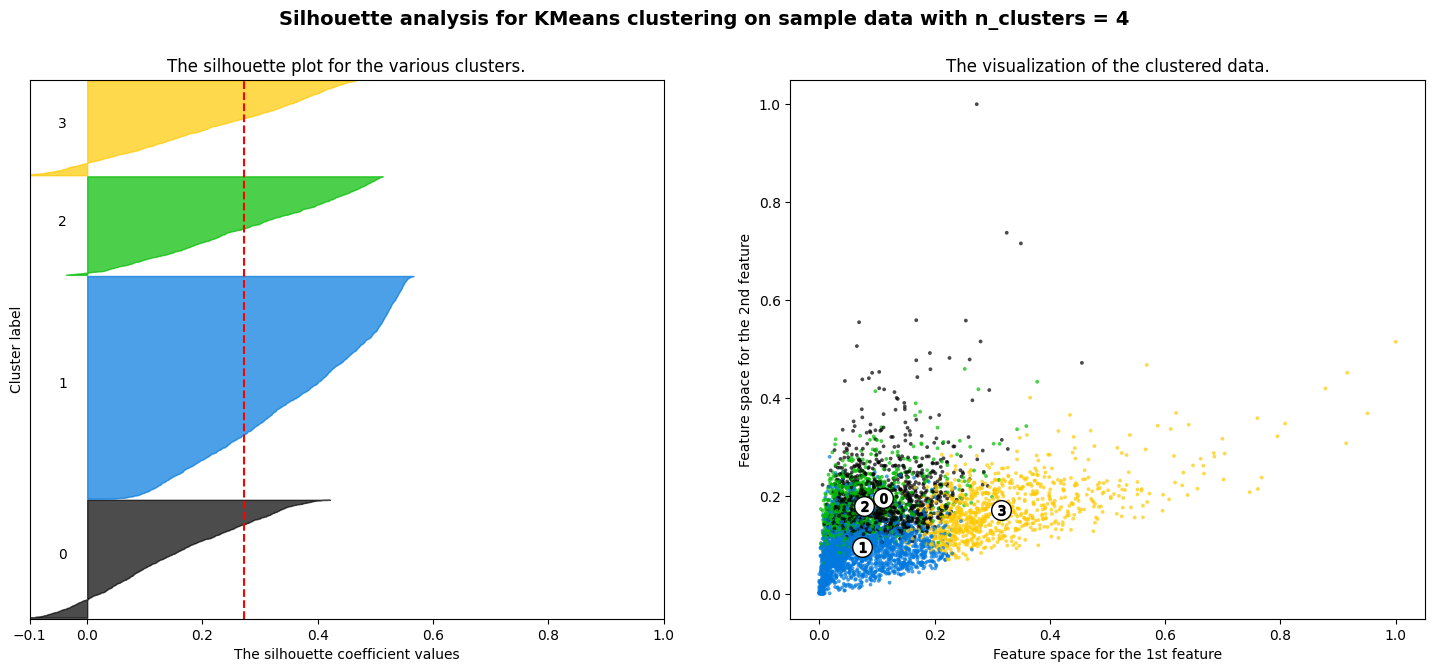

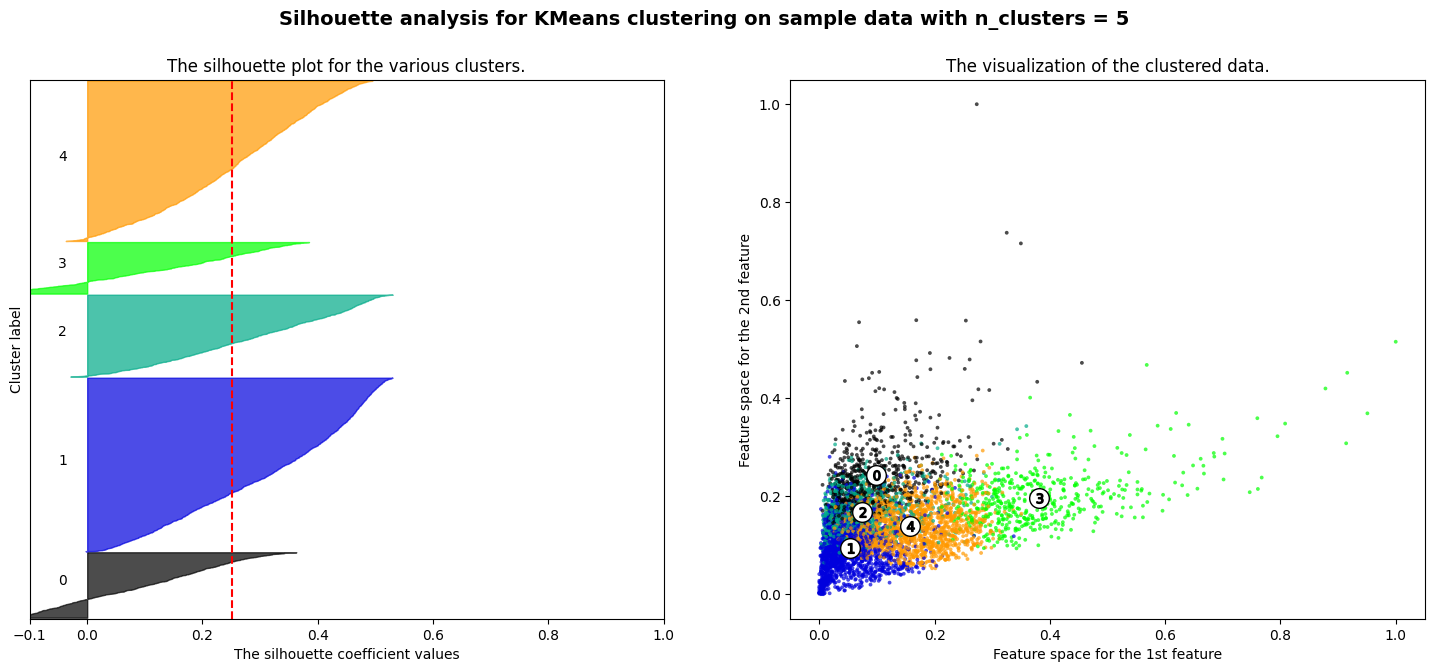

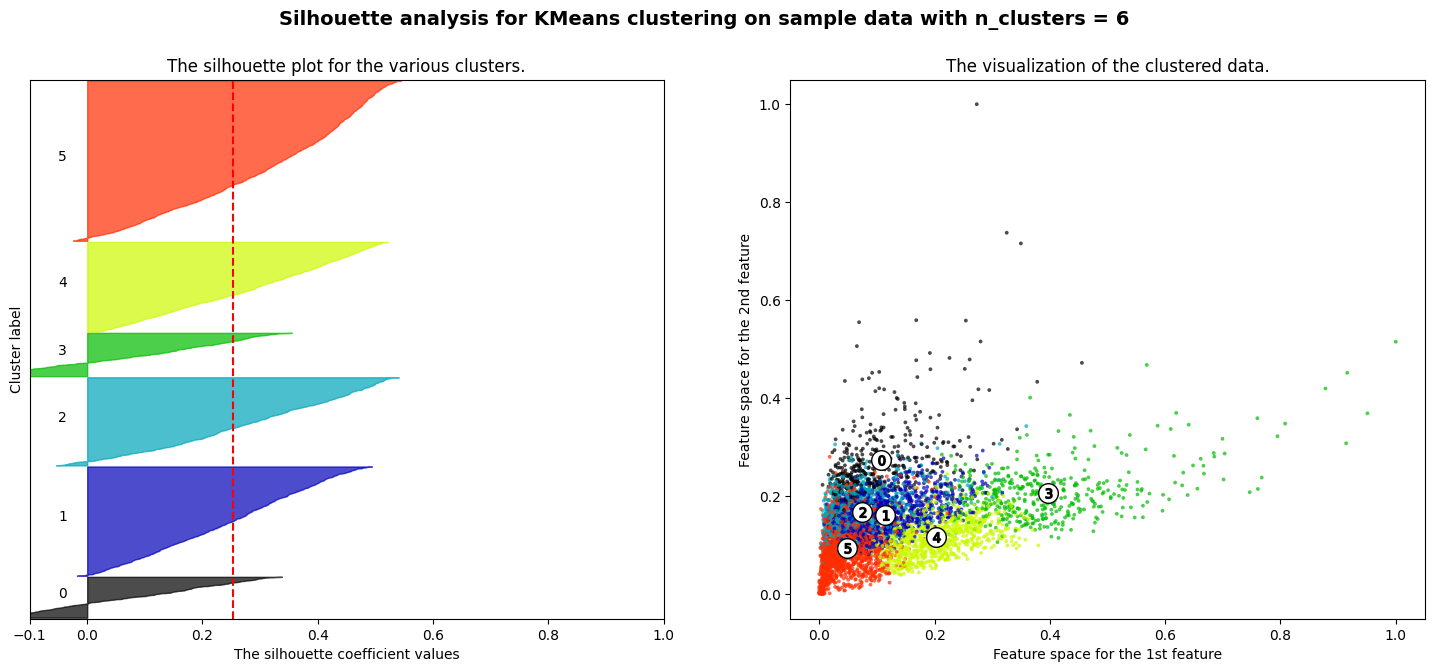

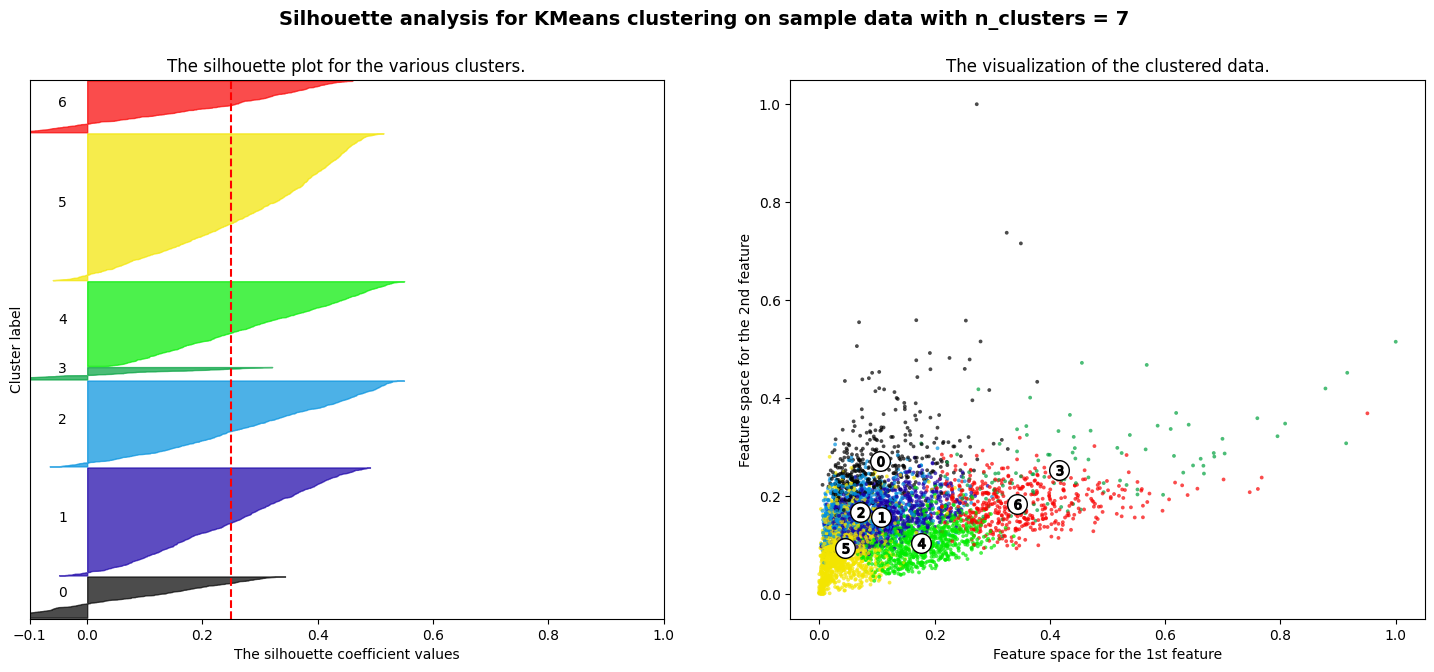

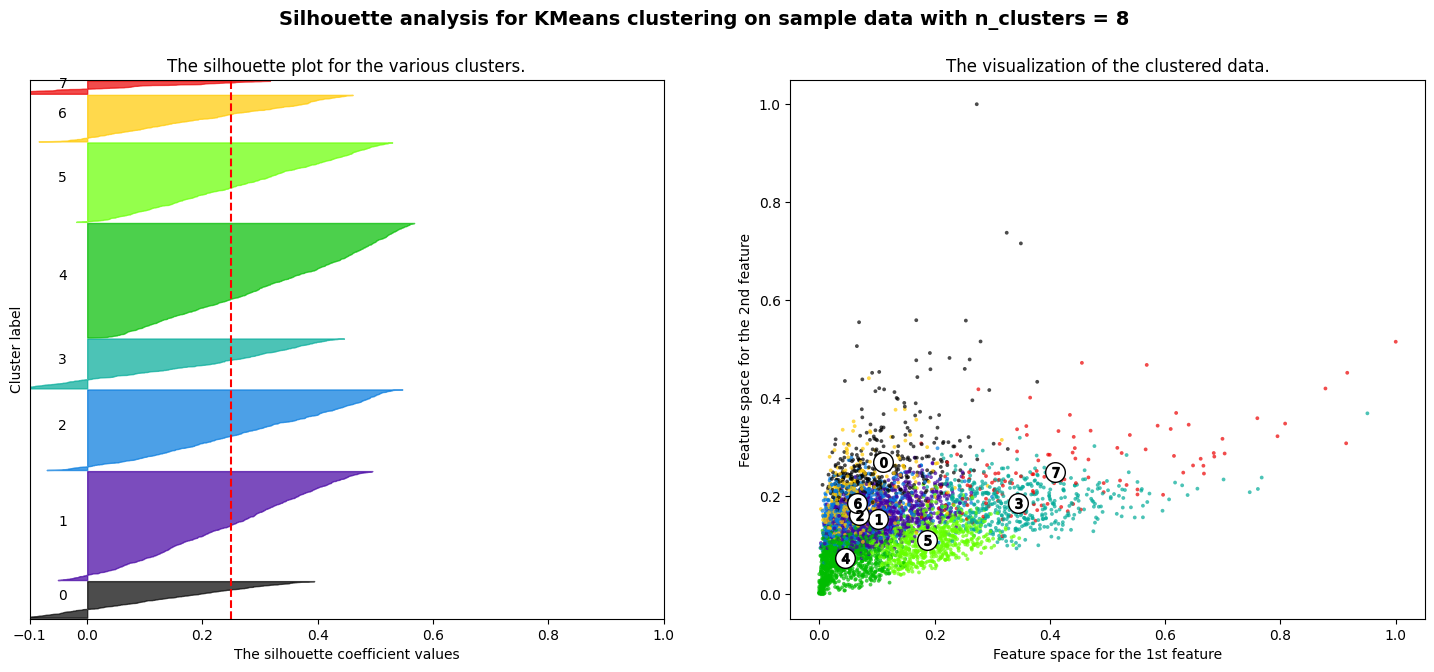

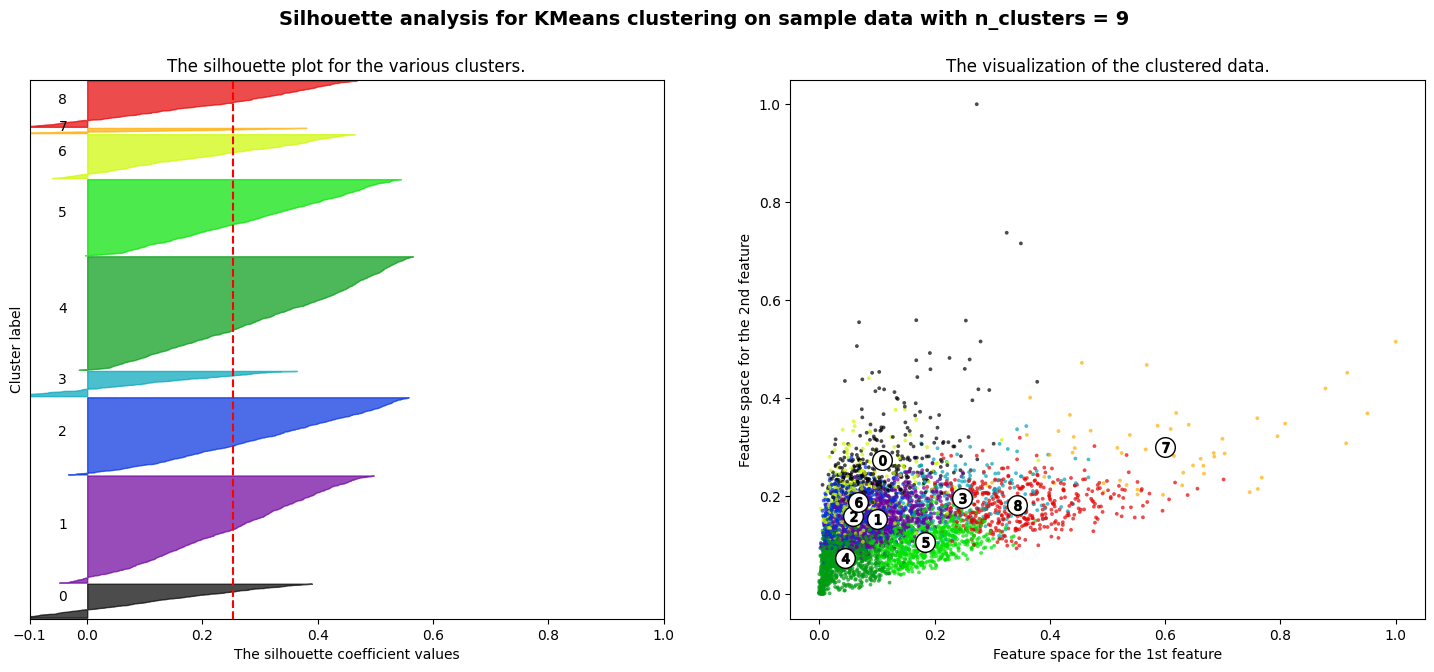

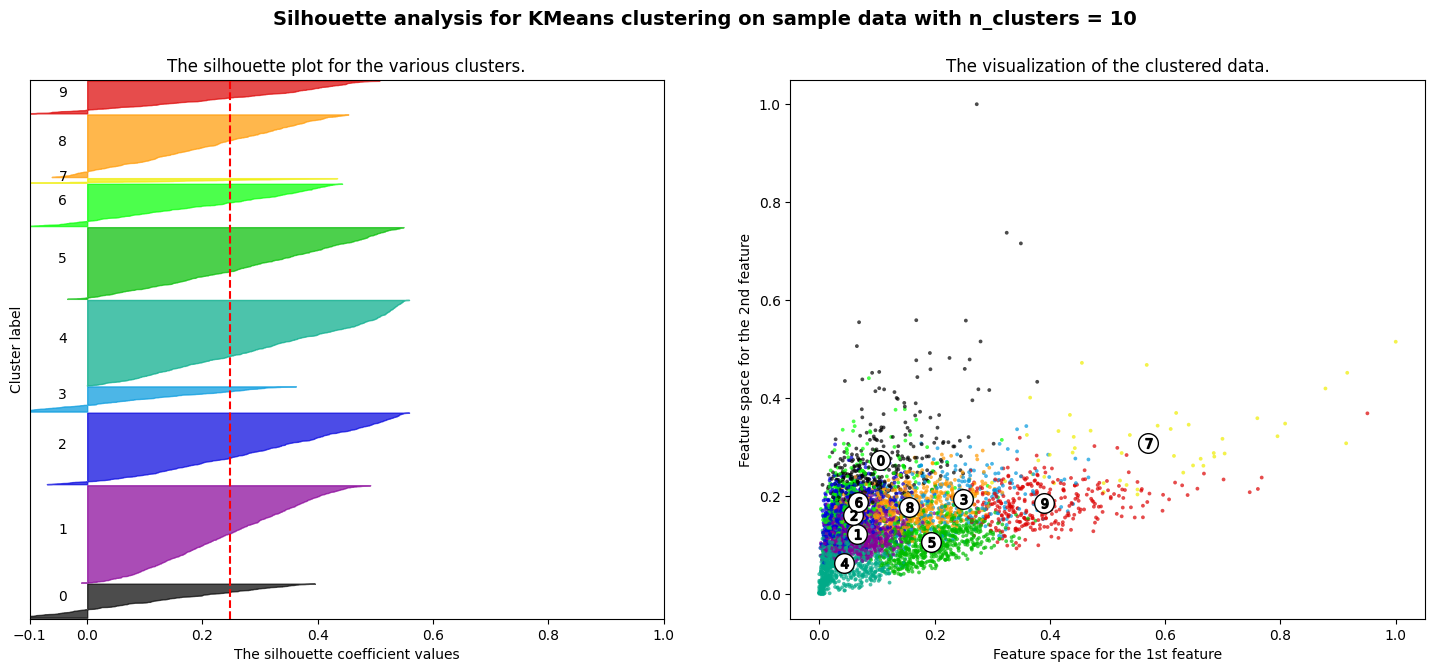

In [ ]:
# Perform Silhouette analysis to find the best K for KMeans

range_n_clusters = range(2,11)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:,0].values, X.iloc[:,1].values, marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Text(0, 0.5, 'inertia')

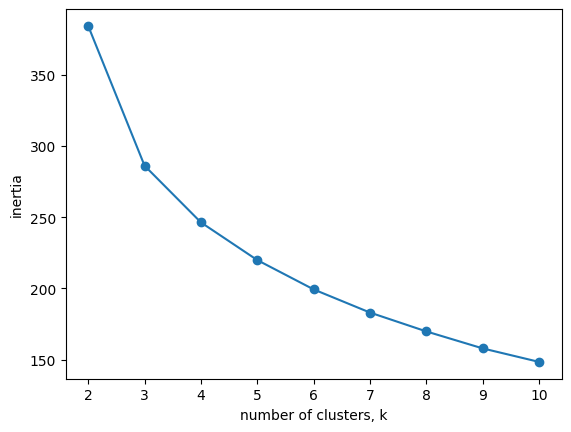

In [ ]:
ks = range(2,11)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')

### KMeans

In [ ]:
kmeans_model = KMeans(n_clusters=3, n_init=10, random_state=10)
cluster_numbers = kmeans_model.fit_predict(X)
cluster_labels = [str(c) for c in cluster_numbers]
fig = px.scatter(X.values, color=cluster_labels)
fig.update_traces(marker=dict(size=5))
fig.show()

In [ ]:
kmeans_train = scaled_train.copy()
kmeans_train['KMeans Cluster Label']=cluster_numbers
kmeans_train.head(6)

Dwellings by Tenure Renter  Total Population  Dwellings by Tenure Owner  \
0                    0.034026          0.095977                   0.173520   
1                    0.056711          0.191239                   0.224507   
2                    0.079395          0.266095                   0.388158   
3                    0.075614          0.129511                   0.226151   
4                    0.026465          0.114818                   0.205592   
5                    0.034972          0.096793                   0.157895   

   Total Households For Period Of Construction Built Before_1980  \
0                                           0.266744               
1                                           0.000000               
2                                           0.058891               
3                                           0.302540               
4                                           0.046189               
5                                           0.175520               

   Total Households For Structure Type Houses  \
0                                    0.158409   
1                                    0.224006   
2                                    0.331472   
3                                    0.176553   
4                                    0.144452   
5                                    0.158409   

   Total Households For Structure Type Apartment, Building Low And High Rise  \
0                                           0.016603                           
1                                           0.006386                           
2                                           0.051086                           
3                                           0.035121                           
4                                           0.041507                           
5                                           0.000000                           

   Total Households For Period Of Construction Built Between_1981_2000  \
0                                           0.024528                     
1                                           0.005660                     
2                                           0.547170                     
3                                           0.130189                     
4                                           0.443396                     
5                                           0.133962                     

   Total Households For Period Of Construction Built After_2011  \
0                                           0.000000              
1                                           0.170532              
2                                           0.049113              
3                                           0.006139              
4                                           0.001364              
5                                           0.002046              

   Median Household Income (Current Year $)  KMeans Cluster Label  
0                                  0.385965                     2  
1                                  0.404432                     2  
2                                  0.376731                     1  
3                                  0.192059                     2  
4                                  0.358264                     1  
5                                  0.353647                     2

In [ ]:
# Split the df based on different cluster lable
cluster0 = kmeans_train[kmeans_train['KMeans Cluster Label'] == 0]
cluster0.reset_index(drop=True, inplace=True)

cluster1 = kmeans_train[kmeans_train['KMeans Cluster Label'] == 1]
cluster1.reset_index(drop=True, inplace=True)

cluster2 = kmeans_train[kmeans_train['KMeans Cluster Label'] == 2]
cluster2.reset_index(drop=True, inplace=True)

In [ ]:
# Unscaled df with cluster label
original_data = scaler.inverse_transform(kmeans_train.iloc[:, :-1])
original_dftrain = pd.DataFrame(original_data, columns=scaled_train.columns.tolist())
original_dftrain['KMeans Cluster Label']=cluster_numbers
## original_dftrain = original_dftrain.drop('Median Household Income (Current Year $)', axis = 1)

# Unscaled df for each label
original_cluster0 = original_dftrain[original_dftrain['KMeans Cluster Label'] == 0]
original_cluster1 = original_dftrain[original_dftrain['KMeans Cluster Label'] == 1]
original_cluster2 = original_dftrain[original_dftrain['KMeans Cluster Label'] == 2]

original_dftrain.head(6)

Dwellings by Tenure Renter  Total Population  Dwellings by Tenure Owner  \
0                       180.0            3088.0                     1055.0   
1                       300.0            5889.0                     1365.0   
2                       420.0            8090.0                     2360.0   
3                       400.0            4074.0                     1375.0   
4                       140.0            3642.0                     1250.0   
5                       185.0            3112.0                      960.0   

   Total Households For Period Of Construction Built Before_1980  \
0                                             1155.0               
1                                                0.0               
2                                              255.0               
3                                             1310.0               
4                                              200.0               
5                                              760.0               

   Total Households For Structure Type Houses  \
0                                      1135.0   
1                                      1605.0   
2                                      2375.0   
3                                      1265.0   
4                                      1035.0   
5                                      1135.0   

   Total Households For Structure Type Apartment, Building Low And High Rise  \
0                                              130.0                           
1                                               50.0                           
2                                              400.0                           
3                                              275.0                           
4                                              325.0                           
5                                                0.0                           

   Total Households For Period Of Construction Built Between_1981_2000  \
0                                               65.0                     
1                                               15.0                     
2                                             1450.0                     
3                                              345.0                     
4                                             1175.0                     
5                                              355.0                     

   Total Households For Period Of Construction Built After_2011  \
0                                                0.0              
1                                             1250.0              
2                                              360.0              
3                                               45.0              
4                                               10.0              
5                                               15.0              

   Median Household Income (Current Year $)  KMeans Cluster Label  
0                                  107000.0                     2  
1                                  111000.0                     2  
2                                  105000.0                     1  
3                                   65000.0                     2  
4                                  101000.0                     1  
5                                  100000.0                     2

## Build Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
# Extract Xs and y for each cluster
X_C0 = cluster0.drop(['Median Household Income (Current Year $)'], axis = 1)
y_C0 = cluster0['Median Household Income (Current Year $)']

X_C1 = cluster1.drop(['Median Household Income (Current Year $)'], axis = 1)
y_C1 = cluster1['Median Household Income (Current Year $)']

X_C2 = cluster2.drop(['Median Household Income (Current Year $)'], axis = 1)
y_C2 = cluster2['Median Household Income (Current Year $)']

In [ ]:
X_train_C0, X_test_C0, y_train_C0, y_test_C0 = train_test_split(X_C0, y_C0, test_size=0.4, random_state=1)
X_train_C1, X_test_C1, y_train_C1, y_test_C1 = train_test_split(X_C1, y_C1, test_size=0.4, random_state=1)
X_train_C2, X_test_C2, y_train_C2, y_test_C2 = train_test_split(X_C2, y_C2, test_size=0.4, random_state=1)

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

#### Cluster 0

In [ ]:
ridge_C0 = Ridge()

# Define a range of alpha values to test
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_result_C0 = GridSearchCV(ridge_C0, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_result_C0.fit(X_train_C0, y_train_C0)

best_alpha = grid_result_C0.best_params_['alpha']

print("Best: %f using %s" % (-grid_result_C0.best_score_, grid_result_C0.best_params_))


Best: 0.001815 using {'alpha': 0.01}


In [ ]:
# Fit the Best Ridge Regression Model
ridge_C0 = Ridge(alpha=best_alpha)
ridge_C0.fit(X_train_C0, y_train_C0)

Ridge(alpha=0.01)

In [ ]:
# Calculate the Validation MSE
y_pred_ridge_C0 = ridge_C0.predict(X_test_C0)

mse_ridge_C0 = mean_squared_error(y_test_C0, y_pred_ridge_C0)
print(f"Test MSE: {mse_ridge_C0}")

mae_ridge_C0 = mean_absolute_error(y_test_C0, y_pred_ridge_C0)
print(f"Test MAE: {mae_ridge_C0}")

Mean Squared Error for Ridge Regression: 0.0020473526243530147
Mean Absolute Error for Ridge Regression: 0.03532633763791486


#### Cluster 1

In [ ]:
ridge_C1 = Ridge()

grid_result_C1 = GridSearchCV(ridge_C1, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_result_C1.fit(X_train_C1, y_train_C1)

best_alpha = grid_result_C1.best_params_['alpha']

print("Best: %f using %s" % (-grid_result_C1.best_score_, grid_result_C1.best_params_))

Best: 0.003059 using {'alpha': 0.01}


In [ ]:
# Fit the Best Ridge Regression Model
ridge_C1 = Ridge(alpha=best_alpha)
ridge_C1.fit(X_train_C1, y_train_C1)

Ridge(alpha=0.01)

In [ ]:
# Calculate the Validation MSE
y_pred_ridge_C1 = ridge_C1.predict(X_test_C1)

mse_ridge_C1 = mean_squared_error(y_test_C1, y_pred_ridge_C1)
print(f"Test MSE: {mse_ridge_C1}")

mae_ridge_C1 = mean_absolute_error(y_test_C1, y_pred_ridge_C1)
print(f"Test MAE: {mae_ridge_C1}")

Mean Squared Error for Ridge Regression: 0.0029328244539860437
Mean Absolute Error for Ridge Regression: 0.04158896515688742


#### Cluster 2

In [ ]:
ridge_C2 = Ridge()

grid_result_C2 = GridSearchCV(ridge_C2, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_result_C2.fit(X_train_C2, y_train_C2)

best_alpha = grid_result_C2.best_params_['alpha']

print("Best: %f using %s" % (-grid_result_C2.best_score_, grid_result_C2.best_params_))

Best: 0.005729 using {'alpha': 0.01}


In [ ]:
# Fit the Best Ridge Regression Model
ridge_C2 = Ridge(alpha=0.01)
ridge_C2.fit(X_train_C2, y_train_C2)

Ridge(alpha=0.01)

In [ ]:
# Calculate the Validation MSE
y_pred_ridge_C2 = ridge_C2.predict(X_test_C2)

mse_ridge_C2 = mean_squared_error(y_test_C2, y_pred_ridge_C2)
print(f"Test MSE: {mse_ridge_C2}")

mae_ridge_C2 = mean_absolute_error(y_test_C2, y_pred_ridge_C2)
print(f"Test MAE: {mae_ridge_C2}")

Mean Squared Error for Ridge Regression: 0.006206683696305758
Mean Absolute Error for Ridge Regression: 0.05323223566182332


### KNN Regression

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
neighbors_range = np.arange(1,22)
param_grid = dict(n_neighbors=neighbors_range)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

#### Cluter 0

In [ ]:
KNN_C0 = KNeighborsRegressor()

grid = GridSearchCV(estimator=KNN_C0, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_results= grid.fit(X_train_C0, y_train_C0)

best_n_neighbors = grid_results.best_params_['n_neighbors']

print("Best n neighbors:", best_n_neighbors)
print("Best MSE: %f using %s" %(-grid_results.best_score_,grid_results.best_params_))

Best n neighbors: 13
Best MSE: 0.001772 using {'n_neighbors': 13}


In [ ]:
KNN_C0 = KNeighborsRegressor(n_neighbors=best_n_neighbors)
KNN_C0.fit(X_train_C0, y_train_C0)

y_pred = KNN_C0.predict(X_test_C0)
mse_KNN_C0 = mean_squared_error(y_test_C0, y_pred)
print("Test MSE:", mse_KNN_C0)

mae_KNN_C0 = mean_absolute_error(y_test_C0, y_pred)
print(f"Test MAE: {mae_KNN_C0}")

Test MSE: 0.001895436429105332
Test MAE: 0.033080710321094324


#### Cluster 1

In [ ]:
KNN_C1 = KNeighborsRegressor()

grid = GridSearchCV(estimator=KNN_C1, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_results= grid.fit(X_train_C1, y_train_C1)

best_n_neighbors = grid_results.best_params_['n_neighbors']

print("Best n neighbors:", best_n_neighbors)
print("Best MSE: %f using %s" %(-grid_results.best_score_,grid_results.best_params_))

Best n neighbors: 9
Best MSE: 0.003248 using {'n_neighbors': 9}


In [ ]:
KNN_C1 = KNeighborsRegressor(n_neighbors=best_n_neighbors)
KNN_C1.fit(X_train_C1, y_train_C1)

y_pred = KNN_C1.predict(X_test_C1)
mse_KNN_C1 = mean_squared_error(y_test_C1, y_pred)
print("Test MSE:", mse_KNN_C1)

mae_KNN_C1 = mean_absolute_error(y_test_C1, y_pred)
print(f"Test MAE: {mae_KNN_C1}")

Test MSE: 0.0032750133243135927
Test MAE: 0.04381350920519491


#### Cluster 2

In [ ]:
KNN_C2 = KNeighborsRegressor()

grid = GridSearchCV(estimator=KNN_C2, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_results= grid.fit(X_train_C2, y_train_C2)

best_n_neighbors = grid_results.best_params_['n_neighbors']

print("Best n neighbors:", best_n_neighbors)
print("Best MSE: %f using %s" %(-grid_results.best_score_,grid_results.best_params_))

Best n neighbors: 17
Best MSE: 0.005974 using {'n_neighbors': 17}


In [ ]:
KNN_C2 = KNeighborsRegressor(n_neighbors=best_n_neighbors)
KNN_C2.fit(X_train_C2, y_train_C2)

y_pred = KNN_C2.predict(X_test_C2)
mse_KNN_C2 = mean_squared_error(y_test_C2, y_pred)
print("Test MSE:", mse_KNN_C2)

mae_KNN_C2 = mean_absolute_error(y_test_C2, y_pred)
print(f"Test MAE: {mae_KNN_C2}")

Test MSE: 0.006289400636800061
Test MAE: 0.05413989893543489


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

#### Cluster 0

In [ ]:
tree_C0 = DecisionTreeRegressor(random_state=1)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_result_C0 = GridSearchCV(tree_C0, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_result_C0.fit(X_train_C0, y_train_C0)

best_max_depth = grid_result_C0.best_params_['max_depth']
best_min_samples_leaf = grid_result_C0.best_params_['min_samples_leaf']
best_min_samples_split = grid_result_C0.best_params_['min_samples_split']

print("Best: %f using %s" % (-grid_result_C0.best_score_, grid_result_C0.best_params_))

Best: 0.002570 using {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
# Fit the Best Decision Tree Regressor Model
tree_C0 = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split, random_state=1)
tree_C0.fit(X_train_C0, y_train_C0)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=1)

In [ ]:
# Calculate the Validation MSE
y_pred_tree_C0 = tree_C0.predict(X_test_C0)

mse_tree_C0 = mean_squared_error(y_test_C0, y_pred_tree_C0)
print(f"Test MSE: {mse_tree_C0}")

mae_tree_C0 = mean_absolute_error(y_test_C0, y_pred_tree_C0)
print(f"Test MAE: {mae_tree_C0}")

Test MSE: 0.0027552416046871288
Test MAE: 0.04163316950136423


In [ ]:
## fig = plt.figure(figsize = (25, 20))
## plot_tree(tree_C0, feature_names = X_train_C0.columns, rounded = True, filled = True)

#### Cluster 1

In [ ]:
tree_C1 = DecisionTreeRegressor(random_state=1)

grid_result_C1 = GridSearchCV(tree_C1, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_result_C1.fit(X_train_C1, y_train_C1)

best_max_depth = grid_result_C1.best_params_['max_depth']
best_min_samples_leaf = grid_result_C1.best_params_['min_samples_leaf']
best_min_samples_split = grid_result_C1.best_params_['min_samples_split']

print("Best: %f using %s" % (-grid_result_C1.best_score_, grid_result_C1.best_params_))

Best: 0.004130 using {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [ ]:
# Fit the Best Decision Tree Regressor Model
tree_C1 = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split, random_state=1)
tree_C1.fit(X_train_C1, y_train_C1)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      random_state=1)

In [ ]:
# Calculate the Validation MSE
y_pred_tree_C1 = tree_C1.predict(X_test_C1)

mse_tree_C1 = mean_squared_error(y_test_C1, y_pred_tree_C1)
print(f"Test MSE: {mse_tree_C1}")

mae_tree_C1 = mean_absolute_error(y_test_C1, y_pred_tree_C1)
print(f"Test MAE: {mae_tree_C1}")

Test MSE: 0.0036288240083500313
Test MAE: 0.046420899424870814


#### Cluster 2

In [ ]:
tree_C2 = DecisionTreeRegressor(random_state=1)

grid_result_C2 = GridSearchCV(tree_C2, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_result_C2.fit(X_train_C2, y_train_C2)

best_max_depth = grid_result_C2.best_params_['max_depth']
best_min_samples_leaf = grid_result_C2.best_params_['min_samples_leaf']
best_min_samples_split = grid_result_C2.best_params_['min_samples_split']

print("Best: %f using %s" % (-grid_result_C2.best_score_, grid_result_C2.best_params_))

Best: 0.007203 using {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
# Fit the Best Decision Tree Regressor Model
tree_C2 = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split, random_state=1)
tree_C2.fit(X_train_C2, y_train_C2)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=1)

In [ ]:
# Calculate the Validation MSE
y_pred_tree_C2 = tree_C2.predict(X_test_C2)

mse_tree_C2 = mean_squared_error(y_test_C2, y_pred_tree_C2)
print(f"Test MSE: {mse_tree_C2}")

mae_tree_C2 = mean_absolute_error(y_test_C2, y_pred_tree_C2)
print(f"Test MAE: {mae_tree_C2}")

Test MSE: 0.007371863904349443
Test MAE: 0.0597557329189204


### ANN Regression

In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
def create_model(batch_size=None, epochs=None):
    model = Sequential()
    model.add(Dense(12, input_shape=(9,), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

#### Cluster 0

In [ ]:
ANN_C0 = KerasRegressor(model=create_model, verbose=0, random_state=1)

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(model__batch_size=batch_size, model__epochs=epochs)
grid = GridSearchCV(estimator=ANN_C0, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=3, error_score='raise')
grid_result = grid.fit(X_train_C0, y_train_C0)

best_batch_size = grid_result.best_params_['model__batch_size']
best_epochs = grid_result.best_params_['model__epochs']

print("Best batch size:", best_batch_size)
print("Best epochs:", best_epochs)
print("Best MSE: %f using %s" % (-grid_result.best_score_, grid_result.best_params_))


Best batch size: 10
Best epochs: 10
Best MSE: 0.029309 using {'model__batch_size': 10, 'model__epochs': 10}


In [ ]:
ANN_C0 = KerasRegressor(model= create_model,epochs=best_epochs, batch_size=best_batch_size,
                        verbose=2,random_state = 42)

ANN_C0.fit(X_train_C0,y_train_C0)

Epoch 1/10
79/79 - 1s - loss: 0.0156 - 856ms/epoch - 11ms/step
Epoch 2/10
79/79 - 0s - loss: 0.0042 - 129ms/epoch - 2ms/step
Epoch 3/10
79/79 - 0s - loss: 0.0036 - 126ms/epoch - 2ms/step
Epoch 4/10
79/79 - 0s - loss: 0.0030 - 137ms/epoch - 2ms/step
Epoch 5/10
79/79 - 0s - loss: 0.0027 - 126ms/epoch - 2ms/step
Epoch 6/10
79/79 - 0s - loss: 0.0024 - 136ms/epoch - 2ms/step
Epoch 7/10
79/79 - 0s - loss: 0.0023 - 128ms/epoch - 2ms/step
Epoch 8/10
79/79 - 0s - loss: 0.0021 - 168ms/epoch - 2ms/step
Epoch 9/10
79/79 - 0s - loss: 0.0021 - 186ms/epoch - 2ms/step
Epoch 10/10
79/79 - 0s - loss: 0.0020 - 207ms/epoch - 3ms/step


KerasRegressor(
	model=<function create_model at 0x78fcb624fa30>
	build_fn=None
	warm_start=False
	random_state=42
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=2
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
)

In [ ]:
# Calculate the Validation MSE
y_pred = ANN_C0.predict(X_test_C0)

mse_ANN_C0 = mean_squared_error(y_test_C0, y_pred)
print(f"Test MSE: {mse_ANN_C0}")

mae_ANN_C0 = mean_absolute_error(y_test_C0, y_pred)
print(f"Test MAE: {mae_ANN_C0}")

53/53 - 0s - 267ms/epoch - 5ms/step
Test MSE: 0.0022347259459881367
Test MAE: 0.036036696908214934


In [ ]:
keras_model = ANN_C0.model_

# Evaluate the model using Keras's evaluate method
mse_ANN_C0 = keras_model.evaluate(X_test_C0, y_test_C0)
print(f"Test MSE: {mse_ANN_C0}")

17/17 [==============================] - 0s 3ms/step - loss: 0.0022
Test MSE: 0.0022347259800881147


#### Cluster 1

In [ ]:
ANN_C1 = KerasRegressor(model=create_model, verbose=0, random_state=1)

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(model__batch_size=batch_size, model__epochs=epochs)
grid = GridSearchCV(estimator=ANN_C1, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=3, error_score='raise')
grid_result = grid.fit(X_train_C1, y_train_C1)

best_batch_size = grid_result.best_params_['model__batch_size']
best_epochs = grid_result.best_params_['model__epochs']

print("Best batch size:", best_batch_size)
print("Best epochs:", best_epochs)
print("Best MSE: %f using %s" % (-grid_result.best_score_, grid_result.best_params_))

Best batch size: 10
Best epochs: 10
Best MSE: 0.076670 using {'model__batch_size': 10, 'model__epochs': 10}


In [ ]:
ANN_C1 = KerasRegressor(model= create_model,epochs=best_epochs, batch_size=best_batch_size,
                        verbose=2,random_state = 42)

ANN_C1.fit(X_train_C1,y_train_C1)

Epoch 1/10
82/82 - 1s - loss: 0.0500 - 807ms/epoch - 10ms/step
Epoch 2/10
82/82 - 0s - loss: 0.0050 - 139ms/epoch - 2ms/step
Epoch 3/10
82/82 - 0s - loss: 0.0047 - 140ms/epoch - 2ms/step
Epoch 4/10
82/82 - 0s - loss: 0.0044 - 195ms/epoch - 2ms/step
Epoch 5/10
82/82 - 0s - loss: 0.0042 - 207ms/epoch - 3ms/step
Epoch 6/10
82/82 - 0s - loss: 0.0041 - 228ms/epoch - 3ms/step
Epoch 7/10
82/82 - 0s - loss: 0.0040 - 197ms/epoch - 2ms/step
Epoch 8/10
82/82 - 0s - loss: 0.0039 - 208ms/epoch - 3ms/step
Epoch 9/10
82/82 - 0s - loss: 0.0039 - 222ms/epoch - 3ms/step
Epoch 10/10
82/82 - 0s - loss: 0.0039 - 194ms/epoch - 2ms/step


KerasRegressor(
	model=<function create_model at 0x78fcb624fa30>
	build_fn=None
	warm_start=False
	random_state=42
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=2
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
)

In [ ]:
# Calculate the Validation MSE
y_pred = ANN_C1.predict(X_test_C1)

mse_ANN_C1 = mean_squared_error(y_test_C1, y_pred)
print(f"Test MSE: {mse_ANN_C1}")

mae_ANN_C1 = mean_absolute_error(y_test_C1, y_pred)
print(f"Test MAE: {mae_ANN_C1}")

55/55 - 0s - 180ms/epoch - 3ms/step
Test MSE: 0.00409453090742152
Test MAE: 0.04953892690687093


In [ ]:
keras_model = ANN_C1.model_

# Evaluate the model using Keras's evaluate method
mse_ANN_C1 = keras_model.evaluate(X_test_C1, y_test_C1)
print(f"Test MSE: {mse_ANN_C1}")

18/18 [==============================] - 0s 3ms/step - loss: 0.0041
Test MSE: 0.0040945312939584255


#### Cluster 2

In [ ]:
ANN_C2 = KerasRegressor(model=create_model, verbose=0, random_state=1)

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(model__batch_size=batch_size, model__epochs=epochs)
grid = GridSearchCV(estimator=ANN_C2, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=3, error_score='raise')
grid_result = grid.fit(X_train_C2, y_train_C2)

best_batch_size = grid_result.best_params_['model__batch_size']
best_epochs = grid_result.best_params_['model__epochs']

print("Best batch size:", best_batch_size)
print("Best epochs:", best_epochs)
print("Best MSE: %f using %s" % (-grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Best batch size: 10
Best epochs: 10
Best MSE: 0.043762 using {'model__batch_size': 10, 'model__epochs': 10}


In [ ]:
ANN_C2 = KerasRegressor(model= create_model,epochs=best_epochs, batch_size=best_batch_size,
                        verbose=2,random_state = 42)

ANN_C2.fit(X_train_C2,y_train_C2)

Epoch 1/10
155/155 - 1s - loss: 0.0340 - 1s/epoch - 9ms/step
Epoch 2/10
155/155 - 0s - loss: 0.0077 - 403ms/epoch - 3ms/step
Epoch 3/10
155/155 - 0s - loss: 0.0073 - 430ms/epoch - 3ms/step
Epoch 4/10
155/155 - 0s - loss: 0.0071 - 281ms/epoch - 2ms/step
Epoch 5/10
155/155 - 0s - loss: 0.0069 - 276ms/epoch - 2ms/step
Epoch 6/10
155/155 - 0s - loss: 0.0070 - 252ms/epoch - 2ms/step
Epoch 7/10
155/155 - 0s - loss: 0.0068 - 268ms/epoch - 2ms/step
Epoch 8/10
155/155 - 0s - loss: 0.0067 - 247ms/epoch - 2ms/step
Epoch 9/10
155/155 - 0s - loss: 0.0066 - 251ms/epoch - 2ms/step
Epoch 10/10
155/155 - 0s - loss: 0.0067 - 271ms/epoch - 2ms/step


KerasRegressor(
	model=<function create_model at 0x78fcb624fa30>
	build_fn=None
	warm_start=False
	random_state=42
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=2
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
)

In [ ]:
# Calculate the Validation MSE
y_pred = ANN_C2.predict(X_test_C2)

mse_ANN_C2 = mean_squared_error(y_test_C2, y_pred)
print(f"Test MSE: {mse_ANN_C2}")

mae_ANN_C2 = mean_absolute_error(y_test_C2, y_pred)
print(f"Test MAE: {mae_ANN_C2}")

103/103 - 0s - 171ms/epoch - 2ms/step
Test MSE: 0.0071914599113834165
Test MAE: 0.0584894970281674


In [ ]:
keras_model = ANN_C2.model_

# Evaluate the model using Keras's evaluate method
mse_ANN_C2 = keras_model.evaluate(X_test_C2, y_test_C2)
print(f"Test MSE: {mse_ANN_C2}")

33/33 [==============================] - 0s 2ms/step - loss: 0.0072
Test MSE: 0.007191460579633713


## Model Selection
Select the best model for each cluster

In [ ]:
# Cluster 0: Validation MSE for each model
mse_C0_values = {
    "Ridge Regression": mse_ridge_C0,
    "KNN Regression": mse_KNN_C0,
    "Decision Tree Regressor": mse_tree_C0,
    "ANN Regression": mse_ANN_C0
}
lowest_mse_model = min(mse_C0_values, key=mse_C0_values.get)
lowest_mse_value = mse_C0_values[lowest_mse_model]

print(f"MSE for Ridge Regression: {mse_ridge_C0}")
print(f"MSE for KNN Regression: {mse_KNN_C0}")
print(f"MSE for Decision Tree Regressor: {mse_tree_C0}")
print(f"MSE for ANN Regression: {mse_ANN_C0}")

print(f"\nModel with the lowest MSE for Cluster 0: {lowest_mse_model} (MSE: {lowest_mse_value})")

MSE for Ridge Regression: 0.0020473526243530147
MSE for KNN Regression: 0.001895436429105332
MSE for Decision Tree Regressor: 0.0027552416046871288
MSE for ANN Regression: 0.0022347259800881147

Model with the lowest MSE for Cluster 0: KNN Regression (MSE: 0.001895436429105332)


In [ ]:
# Cluster 0: Validation MAE for each model
mae_C0_values = {
    "Ridge Regression": mae_ridge_C0,
    "KNN Regression": mae_KNN_C0,
    "Decision Tree Regressor": mae_tree_C0,
    "ANN Regression": mae_ANN_C0
}
lowest_mae_model = min(mae_C0_values, key=mae_C0_values.get)
lowest_mae_value = mae_C0_values[lowest_mae_model]

print(f"MAE for Ridge Regression: {mae_ridge_C0}")
print(f"MAE for KNN Regression: {mae_KNN_C0}")
print(f"MAE for Decision Tree Regressor: {mae_tree_C0}")
print(f"MAE for ANN Regression: {mae_ANN_C0}")

print(f"\nModel with the lowest MAE for Cluster 0: {lowest_mae_model} (MAE: {lowest_mae_value})")

MAE for Ridge Regression: 0.03532633763791486
MAE for KNN Regression: 0.033080710321094324
MAE for Decision Tree Regressor: 0.04163316950136423
MAE for ANN Regression: 0.036036696908214934

Model with the lowest MAE for Cluster 0: KNN Regression (MAE: 0.033080710321094324)


In [ ]:
# Cluster 1: Validation MSE for each model
mse_C1_values = {
    "Ridge Regression": mse_ridge_C1,
    "KNN Regression": mse_KNN_C1,
    "Decision Tree Regressor": mse_tree_C1,
    "ANN Regression": mse_ANN_C1
}
lowest_mse_model = min(mse_C1_values, key=mse_C1_values.get)
lowest_mse_value = mse_C1_values[lowest_mse_model]

print(f"MSE for Ridge Regression: {mse_ridge_C1}")
print(f"MSE for KNN Regression: {mse_KNN_C1}")
print(f"MSE for Decision Tree Regressor: {mse_tree_C1}")
print(f"MSE for ANN Regression: {mse_ANN_C1}")

print(f"\nModel with the lowest MSE for Cluster 1: {lowest_mse_model} (MSE: {lowest_mse_value})")

MSE for Ridge Regression: 0.0029328244539860437
MSE for KNN Regression: 0.0032750133243135927
MSE for Decision Tree Regressor: 0.0036288240083500313
MSE for ANN Regression: 0.0040945312939584255

Model with the lowest MSE for Cluster 1: Ridge Regression (MSE: 0.0029328244539860437)


In [ ]:
# Cluster 1: Validation MAE for each model
mae_C1_values = {
    "Ridge Regression": mae_ridge_C1,
    "KNN Regression": mae_KNN_C1,
    "Decision Tree Regressor": mae_tree_C1,
    "ANN Regression": mae_ANN_C1
}
lowest_mae_model = min(mae_C1_values, key=mae_C1_values.get)
lowest_mae_value = mae_C1_values[lowest_mae_model]

print(f"MAE for Ridge Regression: {mae_ridge_C1}")
print(f"MAE for KNN Regression: {mae_KNN_C1}")
print(f"MAE for Decision Tree Regressor: {mae_tree_C1}")
print(f"MAE for ANN Regression: {mae_ANN_C1}")

print(f"\nModel with the lowest MAE for Cluster 1: {lowest_mae_model} (MAE: {lowest_mae_value})")

MAE for Ridge Regression: 0.04158896515688742
MAE for KNN Regression: 0.04381350920519491
MAE for Decision Tree Regressor: 0.046420899424870814
MAE for ANN Regression: 0.04953892690687093

Model with the lowest MAE for Cluster 1: Ridge Regression (MAE: 0.04158896515688742)


In [ ]:
# Cluster 2: Validation MSE for each model
mse_C2_values = {
    "Ridge Regression": mse_ridge_C2,
    "KNN Regression": mse_KNN_C2,
    "Decision Tree Regressor": mse_tree_C2,
    "ANN Regression": mse_ANN_C2
}
lowest_mse_model = min(mse_C2_values, key=mse_C2_values.get)
lowest_mse_value = mse_C2_values[lowest_mse_model]

print(f"MSE for Ridge Regression: {mse_ridge_C2}")
print(f"MSE for KNN Regression: {mse_KNN_C2}")
print(f"MSE for Decision Tree Regressor: {mse_tree_C2}")
print(f"MSE for ANN Regression: {mse_ANN_C2}")

print(f"\nModel with the lowest MSE for Cluster 2: {lowest_mse_model} (MSE: {lowest_mse_value})")

MSE for Ridge Regression: 0.006206683696305758
MSE for KNN Regression: 0.006289400636800061
MSE for Decision Tree Regressor: 0.007371863904349443
MSE for ANN Regression: 0.007191460579633713

Model with the lowest MSE for Cluster 2: Ridge Regression (MSE: 0.006206683696305758)


In [ ]:
# Cluster 2: Validation MAE for each model
mae_C2_values = {
    "Ridge Regression": mae_ridge_C2,
    "KNN Regression": mae_KNN_C2,
    "Decision Tree Regressor": mae_tree_C2,
    "ANN Regression": mae_ANN_C2
}
lowest_mae_model = min(mae_C2_values, key=mae_C2_values.get)
lowest_mae_value = mae_C2_values[lowest_mae_model]

print(f"MAE for Ridge Regression: {mae_ridge_C2}")
print(f"MAE for KNN Regression: {mae_KNN_C2}")
print(f"MAE for Decision Tree Regressor: {mae_tree_C2}")
print(f"MAE for ANN Regression: {mae_ANN_C2}")

print(f"\nModel with the lowest MAE for Cluster 1: {lowest_mae_model} (MAE: {lowest_mae_value})")

MAE for Ridge Regression: 0.05323223566182332
MAE for KNN Regression: 0.05413989893543489
MAE for Decision Tree Regressor: 0.0597557329189204
MAE for ANN Regression: 0.0584894970281674

Model with the lowest MAE for Cluster 1: Ridge Regression (MAE: 0.05323223566182332)


## Model Prediction

### Data Preparation for Test data

In [ ]:
# Remove all missing values
dftest = dftest_original.dropna()

# Aggregate some columns
dftest['Total Households For Period Of Construction Built Before_1980'] = dftest.iloc[:, 3] + dftest.iloc[:, 4]
dftest['Total Households For Period Of Construction Built Between_1981_2000'] = dftest.iloc[:, 5] + dftest.iloc[:, 6]
dftest['Total Households For Period Of Construction Built Between_2001_2010'] = dftest.iloc[:, 7] + dftest.iloc[:, 8]
dftest['Total Households For Period Of Construction Built After_2011'] = dftest.iloc[:, 9] + dftest.iloc[:, 10]

# Only keep the variables that selected by feature importance during data preparation for training data
selected_col_indices = [16, 0, 15, 17, 11, 18, 12, 20]
dftest_clean = dftest.iloc[:, selected_col_indices]
dftest_clean

# Scale the testing data between 0 and 1
column_names = dftest_clean.columns.tolist()
scaler = preprocessing.MinMaxScaler()
scaled_test = scaler.fit_transform(dftest_clean)
Xtest = pd.DataFrame(scaled_test, columns=column_names)

# Reorder the Test df columns to match training df order
column_names = Xtest.columns.tolist()
column_names[5], column_names[6] = column_names[6], column_names[5]
Xtest = Xtest[column_names]
Xtest


Dwellings by Tenure Renter  Total Population  Dwellings by Tenure Owner  \
0                      0.892068          0.399650                   0.123887   
1                      0.355007          0.359611                   0.346559   
2                      0.352406          0.406031                   0.263968   
3                      0.146944          0.044782                   0.014575   
4                      0.252276          0.247007                   0.104453   
..                          ...               ...                        ...   
850                    0.009103          0.035182                   0.053441   
851                    0.245774          0.196917                   0.151417   
852                    0.018205          0.159645                   0.153036   
853                    0.057217          0.205670                   0.237247   
854                    0.133940          0.237746                   0.165992   

     Total Households For Period Of Construction Built Before_1980  \
0                                             0.501852               
1                                             0.016667               
2                                             0.009259               
3                                             0.229630               
4                                             0.516667               
..                                                 ...               
850                                           0.068519               
851                                           0.611111               
852                                           0.037037               
853                                           0.488889               
854                                           0.005556               

     Total Households For Structure Type Houses  \
0                                      0.000770   
1                                      0.016179   
2                                      0.212635   
3                                      0.011556   
4                                      0.074730   
..                                          ...   
850                                    0.041602   
851                                    0.161017   
852                                    0.157165   
853                                    0.208783   
854                                    0.202619   

     Total Households For Structure Type Apartment, Building Low And High Rise  \
0                                             0.600143                           
1                                             0.476395                           
2                                             0.227468                           
3                                             0.080114                           
4                                             0.160944                           
..                                                 ...                           
850                                           0.011445                           
851                                           0.121602                           
852                                           0.000000                           
853                                           0.041488                           
854                                           0.037196                           

     Total Households For Period Of Construction Built Between_1981_2000  \
0                                             0.375276                     
1                                             0.256071                     
2                                             0.066225                     
3                                             0.008830                     
4                                             0.070640                     
..                                                 ...                     
850                                           0.030905                   

In [ ]:
# Apply the kmeans model to test data
test_cluster_numbers = kmeans_model.fit_predict(Xtest)

# Add KMeans cluster labels to scaled_test
kmeans_test = Xtest.copy()
kmeans_test['KMeans Cluster Label']=test_cluster_numbers
kmeans_test.head(6)

Dwellings by Tenure Renter  Total Population  Dwellings by Tenure Owner  \
0                    0.892068          0.399650                   0.123887   
1                    0.355007          0.359611                   0.346559   
2                    0.352406          0.406031                   0.263968   
3                    0.146944          0.044782                   0.014575   
4                    0.252276          0.247007                   0.104453   
5                    0.078023          0.169923                   0.101215   

   Total Households For Period Of Construction Built Before_1980  \
0                                           0.501852               
1                                           0.016667               
2                                           0.009259               
3                                           0.229630               
4                                           0.516667               
5                                           0.124074               

   Total Households For Structure Type Houses  \
0                                    0.000770   
1                                    0.016179   
2                                    0.212635   
3                                    0.011556   
4                                    0.074730   
5                                    0.123267   

   Total Households For Structure Type Apartment, Building Low And High Rise  \
0                                           0.600143                           
1                                           0.476395                           
2                                           0.227468                           
3                                           0.080114                           
4                                           0.160944                           
5                                           0.017883                           

   Total Households For Period Of Construction Built Between_1981_2000  \
0                                           0.375276                     
1                                           0.256071                     
2                                           0.066225                     
3                                           0.008830                     
4                                           0.070640                     
5                                           0.245033                     

   Total Households For Period Of Construction Built After_2011  \
0                                           0.152153              
1                                           0.169378              
2                                           0.344498              
3                                           0.001914              
4                                           0.007656              
5                                           0.003828              

   KMeans Cluster Label  
0                     0  
1                     1  
2                     1  
3                     2  
4                     0  
5                     2

In [ ]:
# Unscaled test df with cluster label
original_data = scaler.inverse_transform(kmeans_test.iloc[:, :-1])
original_dftest = pd.DataFrame(original_data, columns=Xtest.columns.tolist())
original_dftest['KMeans Cluster Label']=test_cluster_numbers
original_dftest.head(6)

Dwellings by Tenure Renter  Total Population  Dwellings by Tenure Owner  \
0                      3430.0            7333.0                      765.0   
1                      1365.0            6624.0                     2140.0   
2                      1355.0            7446.0                     1630.0   
3                       565.0            1049.0                       90.0   
4                       970.0            4630.0                      645.0   
5                       300.0            3265.0                      625.0   

   Total Households For Period Of Construction Built Before_1980  \
0                                             1355.0               
1                                               45.0               
2                                               25.0               
3                                              620.0               
4                                             1395.0               
5                                              335.0               

   Total Households For Structure Type Houses  \
0                                         5.0   
1                                       105.0   
2                                      1380.0   
3                                        75.0   
4                                       485.0   
5                                       800.0   

   Total Households For Structure Type Apartment, Building Low And High Rise  \
0                                        1359.324034                           
1                                        1079.034335                           
2                                         515.214592                           
3                                         181.459227                           
4                                         364.538627                           
5                                          40.504292                           

   Total Households For Period Of Construction Built Between_1981_2000  \
0                                        2623.178808                     
1                                        1789.933775                     
2                                         462.913907                     
3                                          61.721854                     
4                                         493.774834                     
5                                        1712.781457                     

   Total Households For Period Of Construction Built After_2011  \
0                                              795.0              
1                                              885.0              
2                                             1800.0              
3                                               10.0              
4                                               40.0              
5                                               20.0              

   KMeans Cluster Label  
0                     0  
1                     1  
2                     1  
3                     2  
4                     0  
5                     2

In [ ]:
original_dftest.groupby(['KMeans Cluster Label']).mean()

Dwellings by Tenure Renter  Total Population  \
KMeans Cluster Label                                                 
0                                    1291.250000       5140.869048   
1                                     476.528384       6075.746725   
2                                     338.462567       3160.165775   

                      Dwellings by Tenure Owner  \
KMeans Cluster Label                              
0                                   1083.769841   
1                                   1735.174672   
2                                    841.631016   

                      Total Households For Period Of Construction Built Before_1980  \
KMeans Cluster Label                                                                  
0                                                           1525.059524               
1                                                            536.506550               
2                                                            532.606952               

                      Total Households For Structure Type Houses  \
KMeans Cluster Label                                               
0                                                     838.888889   
1                                                    1696.069869   
2                                                     817.673797   

                      Total Households For Structure Type Apartment, Building Low And High Rise  \
KMeans Cluster Label                                                                              
0                                                            495.791820                           
1                                                            160.297946                           
2                                                            116.600376                           

                      Total Households For Period Of Construction Built Between_1981_2000  \
KMeans Cluster Label                                                                        
0                                                           1265.298013                     
1                                                           2582.480118                     
2                                                            690.121295                     

                      Total Households For Period Of Construction Built After_2011  
KMeans Cluster Label                                                                
0                                                            257.837302             
1                                                            404.650655             
2                                                            196.310160

In [ ]:
# Split the df based on different cluster lable
test_cluster0 = kmeans_test[kmeans_test['KMeans Cluster Label'] == 0]
test_cluster0.reset_index(drop=True, inplace=True)

test_cluster1 = kmeans_test[kmeans_test['KMeans Cluster Label'] == 1]
test_cluster1.reset_index(drop=True, inplace=True)

test_cluster2 = kmeans_test[kmeans_test['KMeans Cluster Label'] == 2]
test_cluster2.reset_index(drop=True, inplace=True)

In [ ]:
test_cluster0.describe()

Dwellings by Tenure Renter  Total Population  \
count                  252.000000        252.000000   
mean                     0.335826          0.275857   
std                      0.168913          0.080217   
min                      0.068921          0.117969   
25%                      0.218466          0.219251   
50%                      0.299740          0.267506   
75%                      0.421651          0.319206   
max                      1.000000          0.640106   

       Dwellings by Tenure Owner  \
count                 252.000000   
mean                    0.175509   
std                     0.087319   
min                     0.004858   
25%                     0.109109   
50%                     0.165992   
75%                     0.224494   
max                     0.519838   

       Total Households For Period Of Construction Built Before_1980  \
count                                         252.000000               
mean                                            0.564837               
std                                             0.162117               
min                                             0.025926               
25%                                             0.464815               
50%                                             0.553704               
75%                                             0.665278               
max                                             1.000000               

       Total Households For Structure Type Houses  \
count                                  252.000000   
mean                                     0.129259   
std                                      0.096626   
min                                      0.000000   
25%                                      0.047958   
50%                                      0.120570   
75%                                      0.195878   
max                                      0.498459   

       Total Households For Structure Type Apartment, Building Low And High Rise  \
count                                         252.000000                           
mean                                            0.218893                           
std                                             0.137081                           
min                                             0.010014                           
25%                                             0.121602                           
50%                                             0.198140                           
75%                                             0.292024                           
max                                             1.000000                           

       Total Households For Period Of Construction Built Between_1981_2000  \
count                                         252.000000                     
mean                                            0.181015                     
std                                             0.120558                     
min                                             0.013245                     
25%                                             0.092715                     
50%                                             0.151214                     
75%                                             0.249448                     
max                                             0.686534                     

       Total Households For Period Of Construction Built After_2011  \
count                                         252.000000              
mean                                            0.049347              
std                                             0.091793              
min                                             0.000000              
25%                                             0.006699              
50%                                             0.020096              
75%                                             0.050000              
max                            

In [ ]:
test_cluster1.describe()

Dwellings by Tenure Renter  Total Population  \
count                  229.000000        229.000000   
mean                     0.123935          0.328651   
std                      0.090356          0.118070   
min                      0.009103          0.143382   
25%                      0.055917          0.250226   
50%                      0.093628          0.311046   
75%                      0.167750          0.373052   
max                      0.416125          1.000000   

       Dwellings by Tenure Owner  \
count                 229.000000   
mean                    0.281000   
std                     0.100435   
min                     0.083401   
25%                     0.217004   
50%                     0.263968   
75%                     0.319838   
max                     1.000000   

       Total Households For Period Of Construction Built Before_1980  \
count                                         229.000000               
mean                                            0.198706               
std                                             0.158744               
min                                             0.000000               
25%                                             0.048148               
50%                                             0.179630               
75%                                             0.322222               
max                                             0.911111               

       Total Households For Structure Type Houses  \
count                                  229.000000   
mean                                     0.261336   
std                                      0.109255   
min                                      0.000000   
25%                                      0.201849   
50%                                      0.251926   
75%                                      0.306626   
max                                      1.000000   

       Total Households For Structure Type Apartment, Building Low And High Rise  \
count                                         229.000000                           
mean                                            0.070772                           
std                                             0.083665                           
min                                             0.000000                           
25%                                             0.012876                           
50%                                             0.044349                           
75%                                             0.085837                           
max                                             0.476395                           

       Total Households For Period Of Construction Built Between_1981_2000  \
count                                         229.000000                     
mean                                            0.369454                     
std                                             0.166466                     
min                                             0.004415                     
25%                                             0.256071                     
50%                                             0.373068                     
75%                                             0.459161                     
max                                             1.000000                     

       Total Households For Period Of Construction Built After_2011  \
count                                         229.000000              
mean                                            0.077445              
std                                             0.123101              
min                                             0.000000              
25%                                             0.008612              
50%                                             0.035407              
75%                                             0.094737              
max                            

In [ ]:
test_cluster2.describe()

Dwellings by Tenure Renter  Total Population  \
count                  374.000000        374.000000   
mean                     0.088027          0.164003   
std                      0.067542          0.073944   
min                      0.000000          0.000000   
25%                      0.035436          0.117786   
50%                      0.070871          0.165038   
75%                      0.128414          0.211289   
max                      0.377113          0.426813   

       Dwellings by Tenure Owner  \
count                 374.000000   
mean                    0.136297   
std                     0.062829   
min                     0.000000   
25%                     0.095547   
50%                     0.136032   
75%                     0.178745   
max                     0.291498   

       Total Households For Period Of Construction Built Before_1980  \
count                                         374.000000               
mean                                            0.197262               
std                                             0.150451               
min                                             0.000000               
25%                                             0.034259               
50%                                             0.200000               
75%                                             0.319907               
max                                             0.520370               

       Total Households For Structure Type Houses  \
count                                  374.000000   
mean                                     0.125990   
std                                      0.068952   
min                                      0.000000   
25%                                      0.075116   
50%                                      0.132897   
75%                                      0.174884   
max                                      0.294299   

       Total Households For Structure Type Apartment, Building Low And High Rise  \
count                                         374.000000                           
mean                                            0.051479                           
std                                             0.055795                           
min                                             0.000000                           
25%                                             0.009478                           
50%                                             0.034335                           
75%                                             0.074392                           
max                                             0.362661                           

       Total Households For Period Of Construction Built Between_1981_2000  \
count                                         374.000000                     
mean                                            0.098730                     
std                                             0.081299                     
min                                             0.000000                     
25%                                             0.033113                     
50%                                             0.078366                     
75%                                             0.150110                     
max                                             0.384106                     

       Total Households For Period Of Construction Built After_2011  \
count                                         374.000000              
mean                                            0.037571              
std                                             0.057965              
min                                             0.000000              
25%                                             0.004785              
50%                                             0.015311              
75%                                             0.039234              
max                            

### Prediction
Apply the best model to each cluster to predict median income

Note: Run *Part 1 - Data Preparation* before this code

#### Cluster 0 (KNN Regression)

In [ ]:
predictions_C0 = KNN_C0.predict(test_cluster0)
predictions_C0_df = pd.DataFrame(predictions_C0, columns=['Median Income'])

In [ ]:
# Convert scaled predictions into unscaled numbers

# orginial 9 features, prediction corresponding to the 9th feature
placeholder = np.zeros((len(predictions_C0), 9))
placeholder[:, 8] = predictions_C0.ravel()

# apply the inverse transform
unscaled_predictions = scaler.inverse_transform(placeholder)
unscaled_predictions_C0 = unscaled_predictions[:, 8]

# Create a DataFrame
unscaled_predictions_C0_df = pd.DataFrame(unscaled_predictions_C0, columns=['Median Income'])
unscaled_predictions_C0_df

Median Income
0     53230.769231
1     61861.538462
2     51207.692308
3     75815.384615
4     67753.846154
..             ...
247   63169.230769
248   58084.615385
249   47023.076923
250   61207.692308
251   61615.384615

[252 rows x 1 columns]

In [ ]:
average_median_income = unscaled_predictions_C0_df['Median Income'].mean()
print(f"Average Median Income for Cluster 0: {average_median_income}")

Average Median Income for Cluster 0: 61672.00854700855


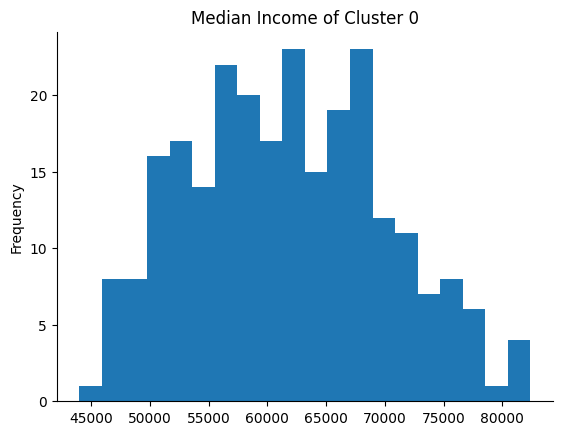

In [ ]:
from matplotlib import pyplot as plt
unscaled_predictions_C0_df['Median Income'].plot(kind='hist', bins=20, title='Median Income of Cluster 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Cluster 1 (Ridge Regression)



In [ ]:
predictions_C1 = ridge_C1.predict(test_cluster1)
predictions_C1_df = pd.DataFrame(predictions_C1, columns=['Median Income'])

In [ ]:
# Convert scaled predictions into unscaled numbers

# orginial 9 features, prediction corresponding to the 9th feature
placeholder = np.zeros((len(predictions_C1), 9))
placeholder[:, 8] = predictions_C1.ravel()

# apply the inverse transform
unscaled_predictions = scaler.inverse_transform(placeholder)
unscaled_predictions_C1 = unscaled_predictions[:, 8]

# Create a DataFrame
unscaled_predictions_C1_df = pd.DataFrame(unscaled_predictions_C1, columns=['Median Income'])
unscaled_predictions_C1_df

Median Income
0     55424.964862
1     71080.586934
2    111996.026325
3    106993.087864
4    116852.213489
..             ...
224  110204.428247
225  118752.308976
226   94948.104115
227   94822.646298
228  113972.904144

[229 rows x 1 columns]

In [ ]:
average_median_income = unscaled_predictions_C1_df['Median Income'].mean()
print(f"Average Median Income for Cluster 1: {average_median_income}")

Average Median Income for Cluster 1: 106838.99680825554


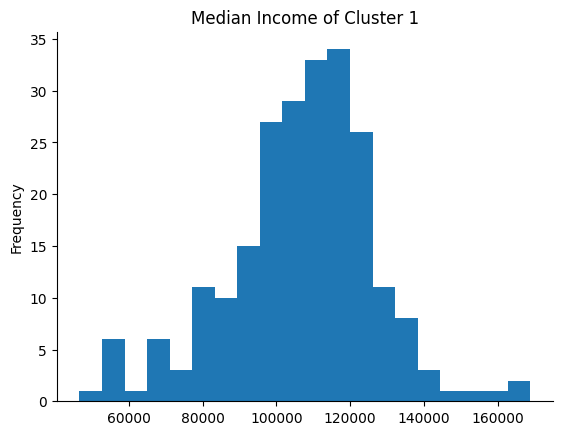

In [ ]:
from matplotlib import pyplot as plt
unscaled_predictions_C1_df['Median Income'].plot(kind='hist', bins=20, title='Median Income of Cluster 1')
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Cluster 2 (Ridge Regression)

In [ ]:
predictions_C2 = ridge_C2.predict(test_cluster2)
predictions_C2_df = pd.DataFrame(predictions_C2, columns=['Median Income'])

In [ ]:
# Convert scaled predictions into unscaled numbers

# original 9 features, prediction corresponding to the 9th feature
placeholder = np.zeros((len(predictions_C2), 9))
placeholder[:, 8] = predictions_C2.ravel()

# apply the inverse transform
unscaled_predictions = scaler.inverse_transform(placeholder)
unscaled_predictions_C2 = unscaled_predictions[:, 8]

# Create a DataFrame
unscaled_predictions_C2_df = pd.DataFrame(unscaled_predictions_C2, columns=['Median Income'])
unscaled_predictions_C2_df

Median Income
0     49176.473173
1    104300.279196
2     90647.226183
3     38399.328441
4    104144.776108
..             ...
369  138597.167863
370   76317.915275
371   89658.355072
372  106558.364966
373  112320.921770

[374 rows x 1 columns]

In [ ]:
average_median_income = unscaled_predictions_C2_df['Median Income'].mean()
print(f"Average Median Income for Cluster 2: {average_median_income}")

Average Median Income for Cluster 2: 97525.17153476019


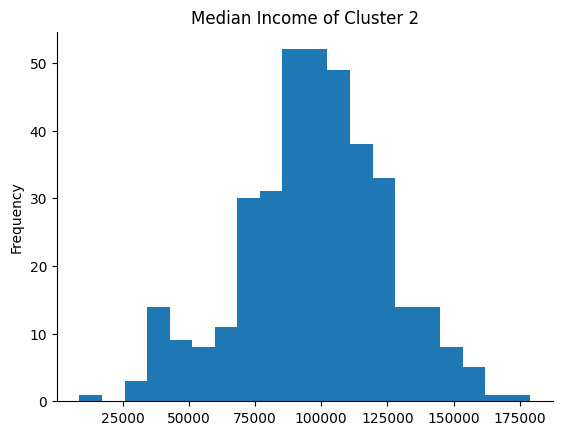

In [ ]:
from matplotlib import pyplot as plt
unscaled_predictions_C2_df['Median Income'].plot(kind='hist', bins=20, title='Median Income of Cluster 2')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Write predictions into TXT

In [ ]:
all_predictions = pd.concat([unscaled_predictions_C0_df, unscaled_predictions_C1_df, unscaled_predictions_C2_df])

file_path = '/content/drive/My Drive/MMA MYTZZY/RSM 8413/Cluster/Team19predictions.txt'
with open(file_path, 'w') as file:
    file.write(all_predictions.to_string(index=False, header=False))